Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
###
### Input delta in folder :  /data
configs = {"analytics_date":"2020-11-17"}
anltdate="2020-11-17"
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [2]:
#sc.stop()

#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
configs = {"analytics_date":"2020-11-17"}
anltdate="2020-11-17"
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-11-17  Afghanistan_nan         0         163.0         434.0   
1  2020-11-17      Albania_nan         0         602.0        1731.0   
2  2020-11-17      Algeria_nan         0         910.0        2614.0   
3  2020-11-17      Andorra_nan         0          42.0         189.0   
4  2020-11-17       Angola_nan         0         164.0         387.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1106.0              43403.0               43548.0  35530000.0   
1        3701.0              28432.0               28898.0   2878445.0   
2        5896.0              68589.0               69369.0  41320000.0   
3         477.0               5914.0                5986.0     77239.0   
4         935.0              13615.0               13746.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001222   
1                                       0.009878   
2                                       0.001660   
3                                       0.076579   
4                                       0.000414   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.012216                    145.0   
1                                           0.098779                    466.0   
2                                           0.016600                    780.0   
3                                           0.765795                     72.0   
4                                           0.004143                    131.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    4.081058             158.000000   
1                  161.892960             528.714294   
2                   18.877058             842.285706   
3                  932.171570              68.142860   
4                    3.985849             133.571426   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           6.225725      
1                                         257.152740      
2                                          28.538239      
3                                        1235.127319      
4                                           5.689723

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +80 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-17           United States_nan          155310.859375   
1   2020-11-17                   Italy_nan           35072.570312   
2   2020-11-17                  Brazil_nan           28776.000000   
3   2020-11-17                  France_nan           26023.427734   
4   2020-11-17          United Kingdom_nan           25331.142578   
5   2020-11-17                  Poland_nan           23664.285156   
6   2020-11-17                  Russia_nan           21530.572266   
7   2020-11-17                 Germany_nan           18340.000000   
8   2020-11-17                   Spain_nan           16520.857422   
9   2020-11-17                    Iran_nan           11738.857422   
10  2020-11-17                 Ukraine_nan           11204.000000   
11  2020-11-17               Argentina_nan            9697.857422   
12  2020-11-17                 Romania_nan            8317.286133   
13  2020-11-17                Colombia_nan            8021.856934   
14  2020-11-17                 Austria_nan            7123.856934   
15  2020-11-17                 Czechia_nan            6906.000000   
16  2020-11-17                Portugal_nan            6036.000000   
17  2020-11-17             Switzerland_nan            5821.714355   
18  2020-11-17             Netherlands_nan            5422.285645   
19  2020-11-17                 Morocco_nan            5176.856934   
20  2020-11-17                 Belgium_nan            4955.571289   
21  2020-11-17                  Jordan_nan            4936.143066   
22  2020-11-17                 Hungary_nan            4668.285645   
23  2020-11-17                  Sweden_nan            4413.428711   
24  2020-11-17                  Serbia_nan            3330.857178   
25  2020-11-17                Bulgaria_nan            3256.285645   
26  2020-11-17                 Georgia_nan            3165.000000   
27  2020-11-17                    Iraq_nan            2829.857178   
28  2020-11-17                  Greece_nan            2602.285645   
29  2020-11-17                 Croatia_nan            2391.857178   
30  2020-11-17                    Peru_nan            2096.857178   
31  2020-11-17                   Nepal_nan            1992.714233   
32  2020-11-17                Slovakia_nan            1600.571411   
33  2020-11-17                 Lebanon_nan            1584.428589   
34  2020-11-17              Azerbaijan_nan            1576.714233   
35  2020-11-17                 Armenia_nan            1488.571411   
36  2020-11-17               Lithuania_nan            1450.857178   
37  2020-11-17              Canada_Ontario            1440.285767   
38  2020-11-17                Slovenia_nan            1417.000000   
39  2020-11-17                   Chile_nan            1389.285767   
40  2020-11-17                 Tunisia_nan            1347.714233   
41  2020-11-17  Bosnia and Herzegovina_nan            1324.285767   
42  2020-11-17               Canada_Quebec            1297.571411   
43  2020-11-17    United Arab Emirates_nan            1180.714233   
44  2020-11-17                 Belarus_nan            1169.428589   
45  2020-11-17                 Denmark_nan            1062.714233   
46  2020-11-17         North Macedonia_nan            1051.571411   
47  2020-11-17                  Panama_nan            1048.000000   
48  2020-11-17                 Moldova_nan            1023.714294   
49  2020-11-17              Costa Rica_nan            1000.714294   
50  2020-11-17              Canada_Alberta             861.285706   
51  2020-11-17                   Libya_nan             754.857117   
52  2020-11-17      West Bank and Gaza_nan             718.428589   
53  2020-11-17                  Kosovo_nan             716.142883   
54  2020-11-17                  Kuwait_nan             693.000000   
55  2020-11-17                  Israel_nan             653.000000   
56  2020-11-17     Canada_British Columbia             604.428589   
57  2020

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-11-17           United States_nan          155310.859375   
1   2020-11-17                   Italy_nan           35072.570312   
2   2020-11-17                  Brazil_nan           28776.000000   
3   2020-11-17                  France_nan           26023.427734   
4   2020-11-17          United Kingdom_nan           25331.142578   
5   2020-11-17                  Poland_nan           23664.285156   
6   2020-11-17                  Russia_nan           21530.572266   
7   2020-11-17                 Germany_nan           18340.000000   
8   2020-11-17                   Spain_nan           16520.857422   
9   2020-11-17                    Iran_nan           11738.857422   
10  2020-11-17                 Ukraine_nan           11204.000000   
11  2020-11-17               Argentina_nan            9697.857422   
12  2020-11-17                 Romania_nan            8317.286133   
13  2020-11-17                Colombia_nan            8021.856934   
14  2020-11-17                 Austria_nan            7123.856934   
15  2020-11-17                 Czechia_nan            6906.000000   
16  2020-11-17                Portugal_nan            6036.000000   
17  2020-11-17             Switzerland_nan            5821.714355   
18  2020-11-17             Netherlands_nan            5422.285645   
19  2020-11-17                 Morocco_nan            5176.856934   
20  2020-11-17                 Belgium_nan            4955.571289   
21  2020-11-17                  Jordan_nan            4936.143066   
22  2020-11-17                 Hungary_nan            4668.285645   
23  2020-11-17                  Sweden_nan            4413.428711   
24  2020-11-17                  Serbia_nan            3330.857178   
25  2020-11-17                Bulgaria_nan            3256.285645   
26  2020-11-17                 Georgia_nan            3165.000000   
27  2020-11-17                    Iraq_nan            2829.857178   
28  2020-11-17                  Greece_nan            2602.285645   
29  2020-11-17                 Croatia_nan            2391.857178   
..         ...                         ...                    ...   
40  2020-11-17                 Tunisia_nan            1347.714233   
41  2020-11-17  Bosnia and Herzegovina_nan            1324.285767   
42  2020-11-17               Canada_Quebec            1297.571411   
43  2020-11-17    United Arab Emirates_nan            1180.714233   
44  2020-11-17                 Belarus_nan            1169.428589   
45  2020-11-17                 Denmark_nan            1062.714233   
46  2020-11-17         North Macedonia_nan            1051.571411   
47  2020-11-17                  Panama_nan            1048.000000   
48  2020-11-17                 Moldova_nan            1023.714294   
49  2020-11-17              Costa Rica_nan            1000.714294   
50  2020-11-17              Canada_Alberta             861.285706   
51  2020-11-17                   Libya_nan             754.857117   
52  2020-11-17      West Bank and Gaza_nan             718.428589   
53  2020-11-17                  Kosovo_nan             716.142883   
54  2020-11-17                  Kuwait_nan             693.000000   
55  2020-11-17                  Israel_nan             653.000000   
56  2020-11-17     Canada_British Columbia             604.428589   
57  2020-11-17              Montenegro_nan             595.000000   
58  2020-11-17                Paraguay_nan             593.000000   
59  2020-11-17              Luxembourg_nan             575.571411   
60  2020-11-17                 Albania_nan             528.714294   
61  2020-11-17              Kyrgyzstan_nan             513.285706   
62  2020-11-17                  Norway_nan             444.142853   
63  2020-11-17             Canada_Manitoba             406.285706   
64  2020-11-17                 Ireland_nan             385.285706   
65  2020-11-17                  Latvia_nan             349.857147   
66  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-11-17           United States_nan          155310.859375   
1   2020-11-17                   Italy_nan           35072.570312   
2   2020-11-17                  France_nan           26023.427734   
3   2020-11-17          United Kingdom_nan           25331.142578   
4   2020-11-17                  Poland_nan           23664.285156   
5   2020-11-17                 Germany_nan           18340.000000   
6   2020-11-17                   Spain_nan           16520.857422   
7   2020-11-17                 Ukraine_nan           11204.000000   
8   2020-11-17               Argentina_nan            9697.857422   
9   2020-11-17                 Romania_nan            8317.286133   
10  2020-11-17                 Austria_nan            7123.856934   
11  2020-11-17                 Czechia_nan            6906.000000   
12  2020-11-17                Portugal_nan            6036.000000   
13  2020-11-17             Switzerland_nan            5821.714355   
14  2020-11-17             Netherlands_nan            5422.285645   
15  2020-11-17                 Belgium_nan            4955.571289   
16  2020-11-17                  Jordan_nan            4936.143066   
17  2020-11-17                 Hungary_nan            4668.285645   
18  2020-11-17                  Sweden_nan            4413.428711   
19  2020-11-17                  Serbia_nan            3330.857178   
20  2020-11-17                Bulgaria_nan            3256.285645   
21  2020-11-17                 Georgia_nan            3165.000000   
22  2020-11-17                  Greece_nan            2602.285645   
23  2020-11-17                 Croatia_nan            2391.857178   
24  2020-11-17                Slovakia_nan            1600.571411   
25  2020-11-17                 Lebanon_nan            1584.428589   
26  2020-11-17                 Armenia_nan            1488.571411   
27  2020-11-17               Lithuania_nan            1450.857178   
28  2020-11-17                Slovenia_nan            1417.000000   
29  2020-11-17  Bosnia and Herzegovina_nan            1324.285767   
30  2020-11-17                 Denmark_nan            1062.714233   
31  2020-11-17         North Macedonia_nan            1051.571411   
32  2020-11-17                  Panama_nan            1048.000000   
33  2020-11-17                 Moldova_nan            1023.714294   
34  2020-11-17              Costa Rica_nan            1000.714294   
35  2020-11-17              Canada_Alberta             861.285706   
36  2020-11-17                  Kosovo_nan             716.142883   
37  2020-11-17              Montenegro_nan             595.000000   
38  2020-11-17              Luxembourg_nan             575.571411   
39  2020-11-17                 Albania_nan             528.714294   
40  2020-11-17             Canada_Manitoba             406.285706   
41  2020-11-17                  Latvia_nan             349.857147   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          656.898682          166045.0   
1                                          811.865051           27352.0   
2                                          520.542908            9072.0   
3                                          533.768799           21363.0   
4                                          872.301208           20816.0   
5                                          310.134064           14580.0   
6                                          495.696533           38273.0   
7                                          358.217041           10048.0   
8                                          300.997406            7893.0   
9                                          596.221191            4931.0   
10                                        1130.514648            4657.0   
11                                         903.193176            5407.0   
12                                         821.224487            83

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-11-17                Brazil_nan           28776.000000   
1   2020-11-17                Russia_nan           21530.572266   
2   2020-11-17                  Iran_nan           11738.857422   
3   2020-11-17              Colombia_nan            8021.856934   
4   2020-11-17               Morocco_nan            5176.856934   
5   2020-11-17            Azerbaijan_nan            1576.714233   
6   2020-11-17            Canada_Ontario            1440.285767   
7   2020-11-17               Tunisia_nan            1347.714233   
8   2020-11-17             Canada_Quebec            1297.571411   
9   2020-11-17  United Arab Emirates_nan            1180.714233   
10  2020-11-17               Belarus_nan            1169.428589   
11  2020-11-17                 Libya_nan             754.857117   
12  2020-11-17    West Bank and Gaza_nan             718.428589   
13  2020-11-17                Kuwait_nan             693.000000   
14  2020-11-17   Canada_British Columbia             604.428589   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          189.530441           13371.0   
1                                          208.600693           22562.0   
2                                          195.663925           13053.0   
3                                          221.223068            6471.0   
4                                          196.854034            3012.0   
5                                          218.132080            1395.0   
6                                          138.393967            1407.0   
7                                          160.007217             599.0   
8                                          214.095459            1218.0   
9                                          175.851059            1209.0   
10                                         173.249161            1263.0   
11                                         153.799316             722.0   
12                                         221.389420             836.0   
13                                         234.517761             489.0   
14                                         165.921570            1959.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        65812.0      201432.0            5876464.0  212559008.0   
1        67316.0      150714.0            1932711.0  144500000.0   
2        36799.0       82172.0             775121.0   83993000.0   
3        22520.0       56153.0            1205217.0   50765952.0   
4        13853.0       36238.0             296189.0   36817128.0   
5         5503.0       11037.0              77083.0   10119557.0   
6         4208.0       10082.0              98778.0   14570000.0   
7         3335.0        9434.0              81003.0   11791968.0   
8         3877.0        9083.0             125072.0    8485000.0   
9         3593.0        8265.0             151554.0    9400000.0   
10        3826.0        8186.0             115448.0    9449974.0   
11        1696.0        5284.0              74324.0    6871292.0   
12        2353.0        5029.0              63867.0    4543126.0   
13        1679.0        4851.0             137329.0    4137000.0   
14        1959.0        4231.0              22945.0    5100000.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.276463           
1                                            0.133752           
2                                            0.092284           
3                                            0.237407           
4                                            0.080449           
5                                            0.076173           
6                                            0.067796           
7                                            0.068694           
8                                            0.147405         

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date          region  delta_roling_7day_AVG  \
0   2020-11-17        Iraq_nan            2829.857178   
1   2020-11-17        Peru_nan            2096.857178   
2   2020-11-17       Nepal_nan            1992.714233   
3   2020-11-17       Chile_nan            1389.285767   
4   2020-11-17      Israel_nan             653.000000   
5   2020-11-17    Paraguay_nan             593.000000   
6   2020-11-17  Kyrgyzstan_nan             513.285706   
7   2020-11-17      Norway_nan             444.142853   
8   2020-11-17     Ireland_nan             385.285706   
9   2020-11-17        Oman_nan             316.428558   
10  2020-11-17       Qatar_nan             227.857147   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          103.522339            2390.0   
1                                           89.307472            2112.0   
2                                           95.215019            1197.0   
3                                          101.933792            1331.0   
4                                          104.935722            1014.0   
5                                          116.737999             525.0   
6                                          110.143860               0.0   
7                                          116.072426               0.0   
8                                          109.503342             453.0   
9                                           95.556511             329.0   
10                                         111.139915             243.0   

    3_day_change  7_day_change  confirmed_yesterday  population  \
0         7046.0       19809.0             521542.0  38270000.0   
1         6774.0       14678.0             937011.0  32870710.0   
2         4620.0       13949.0             210973.0  29300000.0   
3         4574.0        9725.0             532604.0  19081012.0   
4         2060.0        4571.0             324755.0   8712000.0   
5         1707.0        4151.0              72099.0   7111652.0   
6         1529.0        3593.0              66983.0   6524195.0   
7          518.0        3109.0              28434.0   5357000.0   
8         1257.0        2697.0              68356.0   4925877.0   
9         1276.0        2215.0             120718.0   4636000.0   
10         661.0        1595.0             136028.0   2870256.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.136280           
1                                            0.285060           
2                                            0.072005           
3                                            0.279128           
4                                            0.372769           
5                                            0.101383           
6                                            0.102670           
7                                            0.053080           
8                                            0.138771           
9                                            0.260395           
10                                           0.473926           

    delta_new_cases  delta_new_cases_per_1M_hab  
0            3243.0                   84.740005  
1            2147.0                   65.316505  
2            2692.0                   91.877136  
3            1432.0                   75.048424  
4             501.0                   57.506886  
5             634.0                   89.149467  
6             690.0                  105.760178  
7             857.0                  159.977600  
8             343.0                   69.632271  
9             181.0                   39.042278  
10            221.0                   76.996613

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-17              Uzbekistan_nan             193.428574   
1   2020-11-17            Korea, South_nan             192.142853   
2   2020-11-17                   Ghana_nan             167.714279   
3   2020-11-17                 Nigeria_nan             160.142853   
4   2020-11-17             Afghanistan_nan             158.000000   
5   2020-11-17                  Angola_nan             133.571426   
6   2020-11-17                 Bolivia_nan             115.714287   
7   2020-11-17              Mozambique_nan              98.714287   
8   2020-11-17                 Uruguay_nan              77.714287   
9   2020-11-17                Zimbabwe_nan              48.000000   
10  2020-11-17                    Cuba_nan              41.428570   
11  2020-11-17                Cameroon_nan              38.714287   
12  2020-11-17           Cote d'Ivoire_nan              21.857143   
13  2020-11-17                 Iceland_nan              14.857142   
14  2020-11-17             China_Hong Kong              12.285714   
15  2020-11-17            Burkina Faso_nan              10.142858   
16  2020-11-17               Nicaragua_nan              10.000000   
17  2020-11-17                   Niger_nan              10.000000   
18  2020-11-17                 Vietnam_nan               9.714286   
19  2020-11-17               Singapore_nan               8.571428   
20  2020-11-17                Thailand_nan               4.857143   
21  2020-11-17   Australia_New South Wales               4.714286   
22  2020-11-17   Australia_South Australia               4.285714   
23  2020-11-17                 Taiwan*_nan               3.571429   
24  2020-11-17              China_Shanghai               3.142857   
25  2020-11-17             New Zealand_nan               2.571429   
26  2020-11-17             China_Guangdong               2.285714   
27  2020-11-17               China_Sichuan               2.285714   
28  2020-11-17               China_Tianjin               1.857143   
29  2020-11-17        Australia_Queensland               1.142857   
30  2020-11-17               China_Shaanxi               1.142857   
31  2020-11-17  United Kingdom_Isle of Man               0.857143   
32  2020-11-17                Cambodia_nan               0.428571   
33  2020-11-17              China_Liaoning               0.428571   
34  2020-11-17                China_Yunnan               0.428571   
35  2020-11-17                China_Fujian               0.285714   
36  2020-11-17                 China_Henan               0.285714   
37  2020-11-17        China_Inner Mongolia               0.285714   
38  2020-11-17               China_Jiangsu               0.285714   
39  2020-11-17                 China_Anhui               0.142857   
40  2020-11-17                 China_Gansu               0.142857   
41  2020-11-17                 China_Hubei               0.142857   
42  2020-11-17                China_Shanxi               0.142857   
43  2020-11-17          Australia_Victoria               0.000000   
44  2020-11-17               China_Beijing               0.000000   
45  2020-11-17             China_Chongqing               0.000000   
46  2020-11-17               China_Guangxi               0.000000   
47  2020-11-17               China_Guizhou               0.000000   
48  2020-11-17                China_Hainan               0.000000   
49  2020-11-17                 China_Hebei               0.000000   
50  2020-11-17          China_Heilongjiang               0.000000   
51  2020-11-17                 China_Hunan               0.000000   
52  2020-11-17               China_Jiangxi               0.000000   
53  2020-11-17                 China_Jilin               0.000000   
54  2020-11-17                 China_Macau               0.000000   
55  2020-11-17               China_Ningxia               0.000000   
56  2020-11-17               China_Qinghai               0.000000   
57  2020

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                     region  delta_roling_7day_AVG  \
0   2020-11-17             Uzbekistan_nan             193.428574   
1   2020-11-17           Korea, South_nan             192.142853   
2   2020-11-17                  Ghana_nan             167.714279   
3   2020-11-17                Nigeria_nan             160.142853   
4   2020-11-17            Afghanistan_nan             158.000000   
5   2020-11-17                 Angola_nan             133.571426   
6   2020-11-17                Bolivia_nan             115.714287   
7   2020-11-17             Mozambique_nan              98.714287   
8   2020-11-17                Uruguay_nan              77.714287   
9   2020-11-17               Zimbabwe_nan              48.000000   
10  2020-11-17                   Cuba_nan              41.428570   
11  2020-11-17               Cameroon_nan              38.714287   
12  2020-11-17          Cote d'Ivoire_nan              21.857143   
13  2020-11-17                Iceland_nan              14.857142   
14  2020-11-17            China_Hong Kong              12.285714   
15  2020-11-17           Burkina Faso_nan              10.142858   
16  2020-11-17              Nicaragua_nan              10.000000   
17  2020-11-17                  Niger_nan              10.000000   
18  2020-11-17                Vietnam_nan               9.714286   
19  2020-11-17              Singapore_nan               8.571428   
20  2020-11-17               Thailand_nan               4.857143   
21  2020-11-17  Australia_New South Wales               4.714286   
22  2020-11-17  Australia_South Australia               4.285714   
23  2020-11-17                Taiwan*_nan               3.571429   
24  2020-11-17             China_Shanghai               3.142857   
25  2020-11-17            New Zealand_nan               2.571429   
26  2020-11-17            China_Guangdong               2.285714   
27  2020-11-17              China_Sichuan               2.285714   
28  2020-11-17              China_Tianjin               1.857143   
29  2020-11-17       Australia_Queensland               1.142857   
..         ...                        ...                    ...   
33  2020-11-17             China_Liaoning               0.428571   
34  2020-11-17               China_Yunnan               0.428571   
35  2020-11-17               China_Fujian               0.285714   
36  2020-11-17                China_Henan               0.285714   
37  2020-11-17       China_Inner Mongolia               0.285714   
38  2020-11-17              China_Jiangsu               0.285714   
39  2020-11-17                China_Anhui               0.142857   
40  2020-11-17                China_Gansu               0.142857   
41  2020-11-17                China_Hubei               0.142857   
42  2020-11-17               China_Shanxi               0.142857   
43  2020-11-17         Australia_Victoria               0.000000   
44  2020-11-17              China_Beijing               0.000000   
45  2020-11-17            China_Chongqing               0.000000   
46  2020-11-17              China_Guangxi               0.000000   
47  2020-11-17              China_Guizhou               0.000000   
48  2020-11-17               China_Hainan               0.000000   
49  2020-11-17                China_Hebei               0.000000   
50  2020-11-17         China_Heilongjiang               0.000000   
51  2020-11-17                China_Hunan               0.000000   
52  2020-11-17              China_Jiangxi               0.000000   
53  2020-11-17                China_Jilin               0.000000   
54  2020-11-17                China_Macau               0.000000   
55  2020-11-17              China_Ningxia               0.000000   
56  2020-11-17              China_Qinghai               0.000000   
57  2020-11-17             China_Shandong               0.000000   
58  2020-11-17                China_Tibet               0.000000   
59  2020-11-17             China_Xinjiang               0.000000  

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [14]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-17' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

date     region confirmed  1_day_change  3_day_change  7_day_change  \
0  2020-11-17  Sudan_nan         0         102.0         327.0         573.0   

   confirmed_yesterday  confirmed_prediction  population  \
0              14728.0               14768.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001473   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.014729                     40.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                         4.0               81.85714   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                              11.46

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [17]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-11-17' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                   Canada_Prince Edward Island
19                                  Canada_Yukon
20                  Central African Republic_nan
21                                      Chad_nan
22                                   Comoros_nan
23                       Congo (Brazzaville)_nan
24                          Congo (Kinshasa)_nan
25                         Denmark_Faroe Islands
26                             Denmark_Greenland
27                          Diamond Princess_nan
28                                  Djibouti_nan
29                                  Dominica_nan
..                                           ...
50                                   Lesotho_nan
51                                   Liberia_nan
52                                MS Zaandam_nan
53                                Madagascar_nan
54                                    Malawi_nan
55                                  Maldives_nan
56                                      Mali_nan
57                          Marshall Islands_nan
58                                Mauritania_nan
59                                 Mauritius_nan
60                                  Mongolia_nan
61                                   Namibia_nan
62                             Netherlands_Aruba
63  Netherlands_Bonaire, Sint Eustatius and Saba
64                           Netherlands_Curacao
65                      Netherlands_Sint Maarten
66                          Papua New Guinea_nan
67                                    Rwanda_nan
68                     Saint Kitts and Nevis_nan
69                               Saint Lucia_nan
70          Saint Vincent and the Grenadines_nan
71                     Sao Tome and Principe_nan
72                                   Senegal_nan
73                                Seychelles_nan
74                              Sierra Leone_nan
75                           Solomon Islands_nan
76                                   Somalia_nan
77                               South Sudan_nan
78                                     Sudan_nan
79                                  Suriname_nan

[80 rows x 1 columns]

In [18]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-11-17' and region > 'Suriname_nan' and
     population = 10000000 order by region asc

region
0                                 Syria_nan
1                            Tajikistan_nan
2                              Tanzania_nan
3                           Timor-Leste_nan
4                                  Togo_nan
5                   Trinidad and Tobago_nan
6                   United Kingdom_Anguilla
7                    United Kingdom_Bermuda
8     United Kingdom_British Virgin Islands
9             United Kingdom_Cayman Islands
10  United Kingdom_Turks and Caicos Islands
11                              Vanuatu_nan
12                       Western Sahara_nan
13                                Yemen_nan
14                               Zambia_nan

In [19]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [20]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= '2020-11-17' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [21]:
sc.stop()

In [22]:
%matplotlib inline
##%matplotlib notebook

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


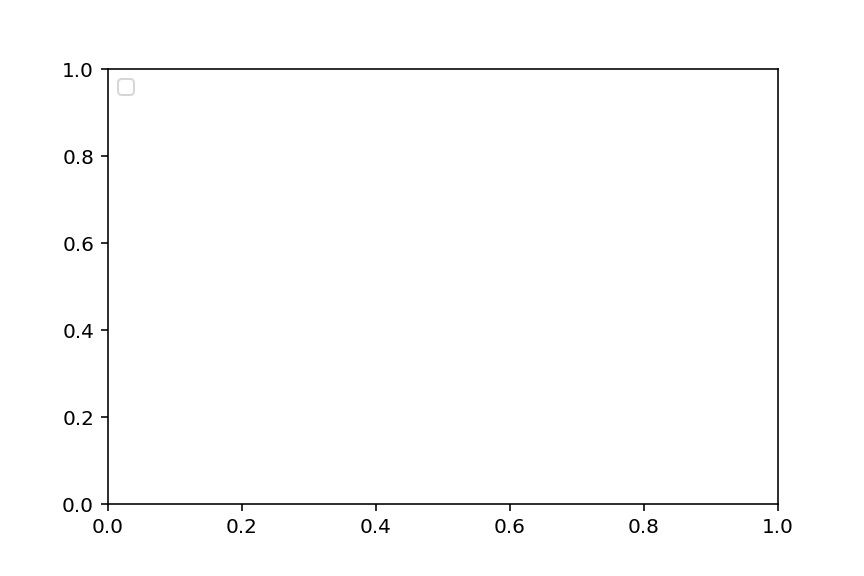

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


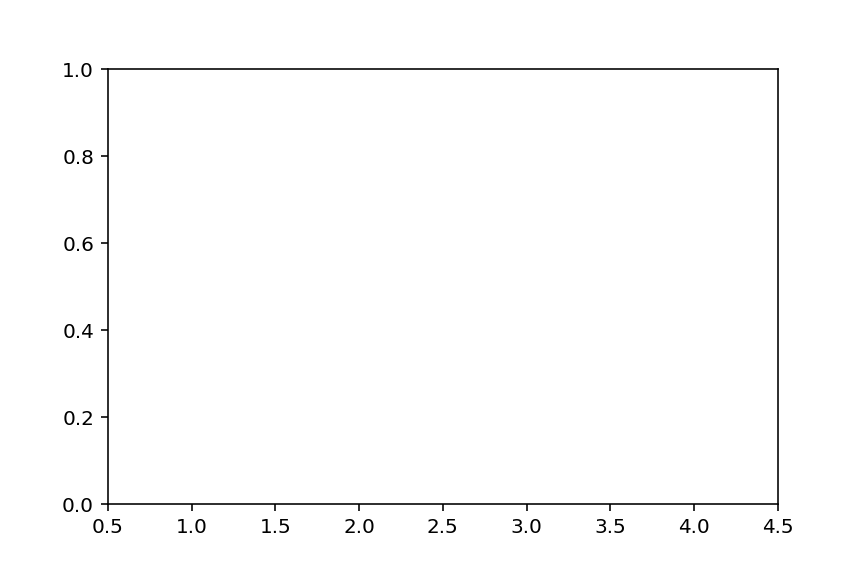

In [24]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


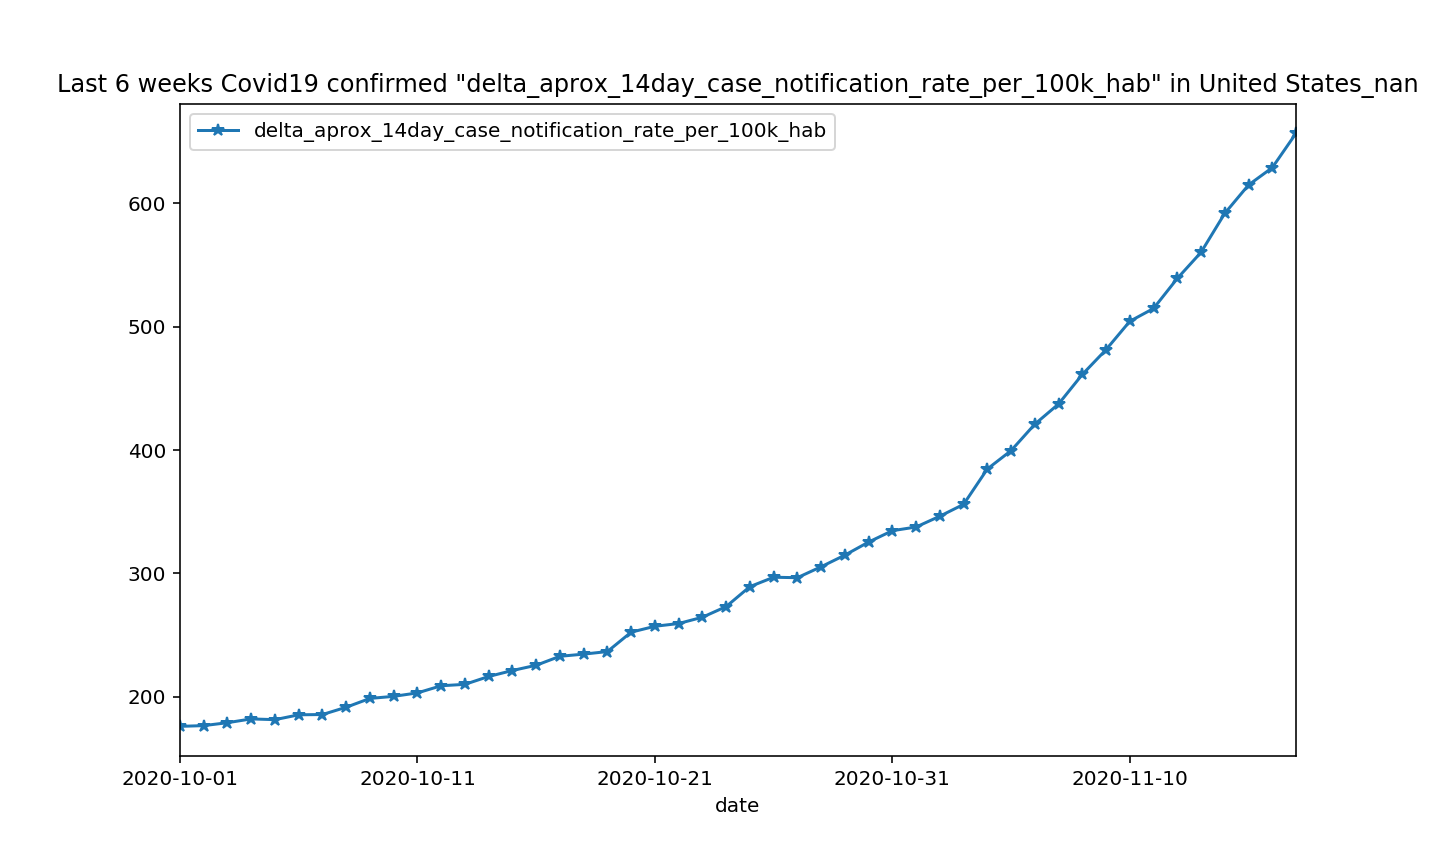

In [26]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


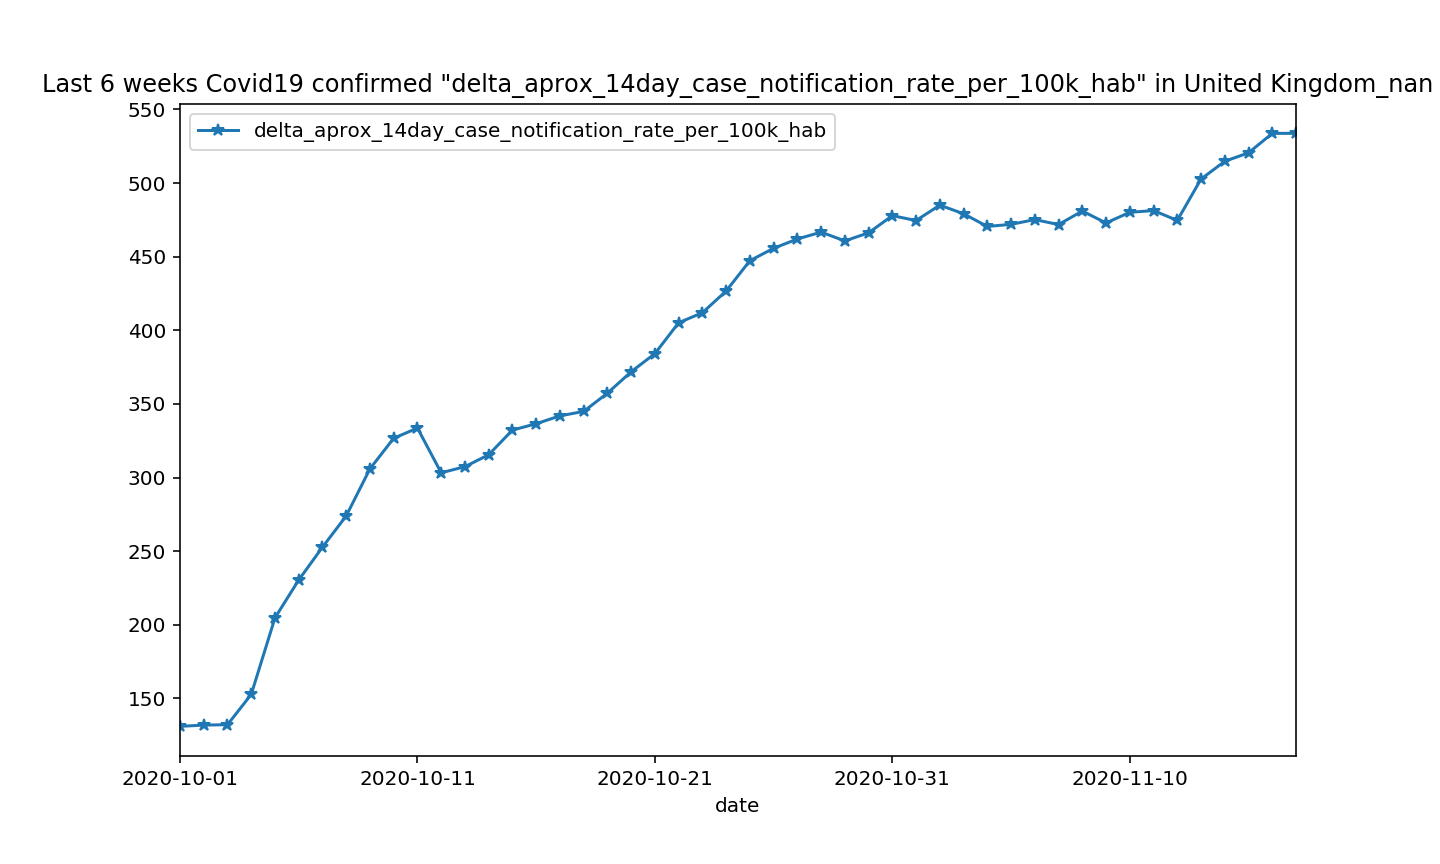

In [27]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


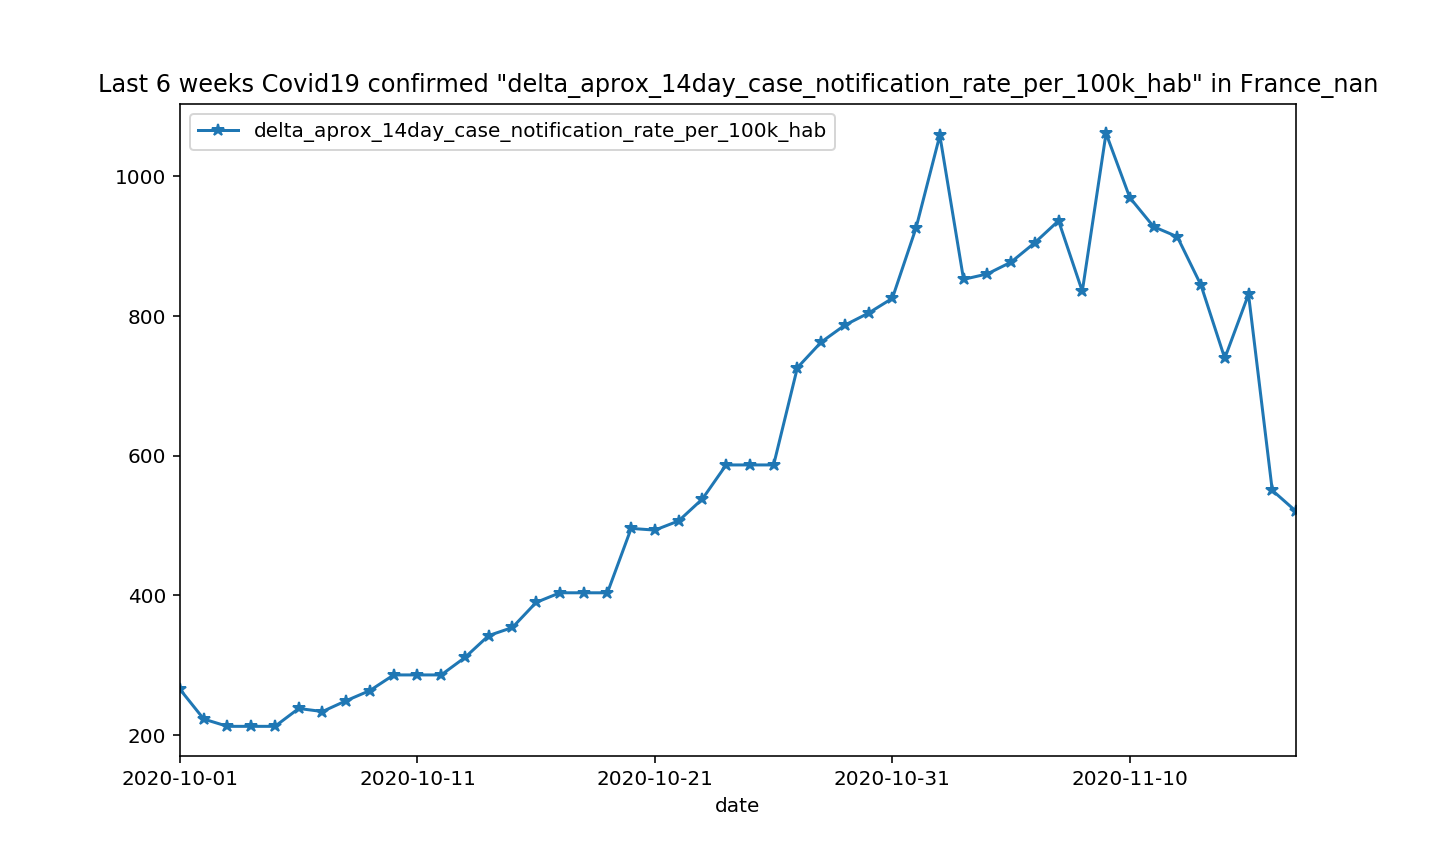

In [28]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


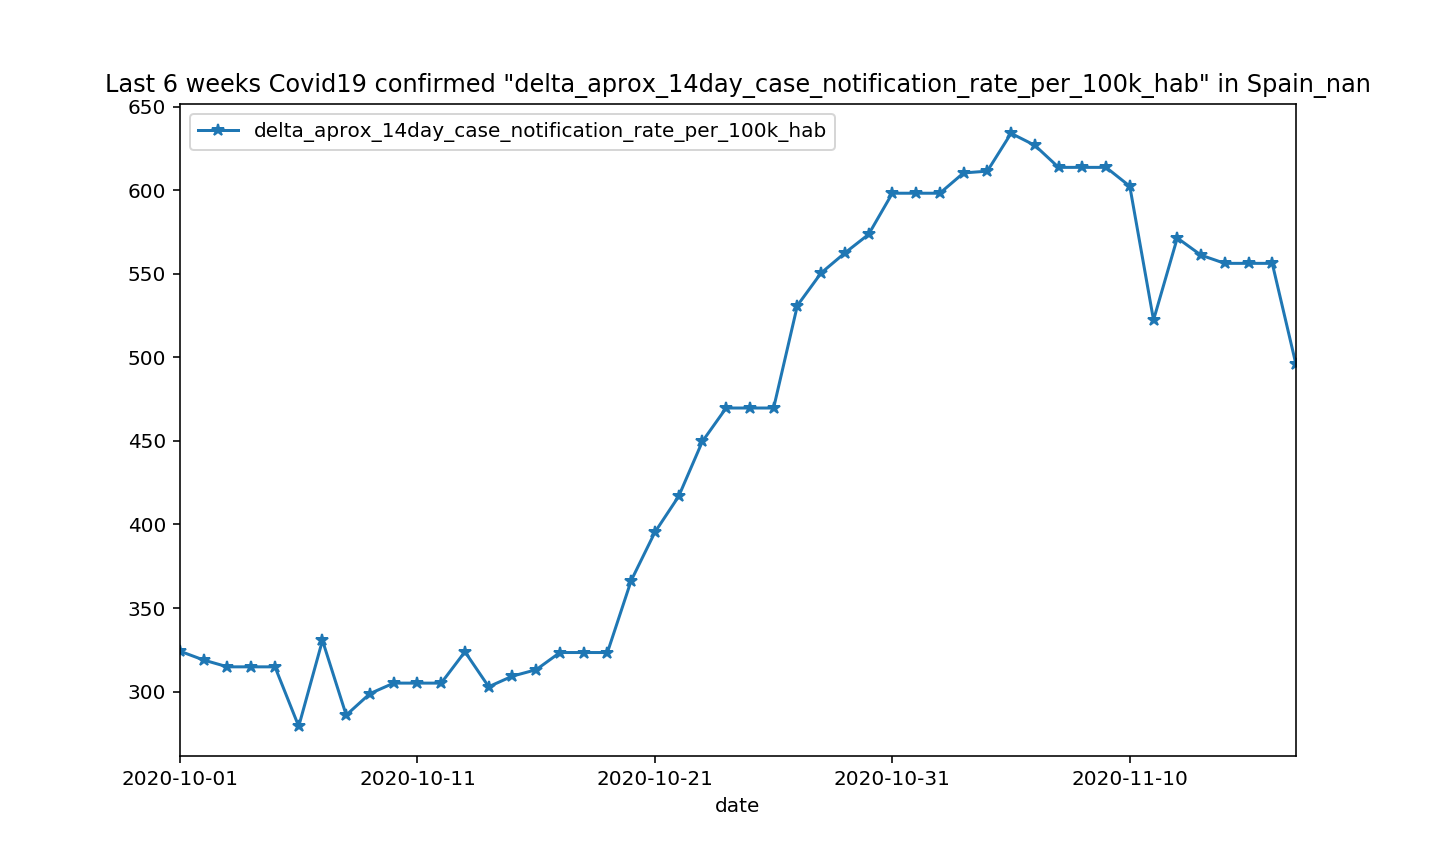

In [29]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


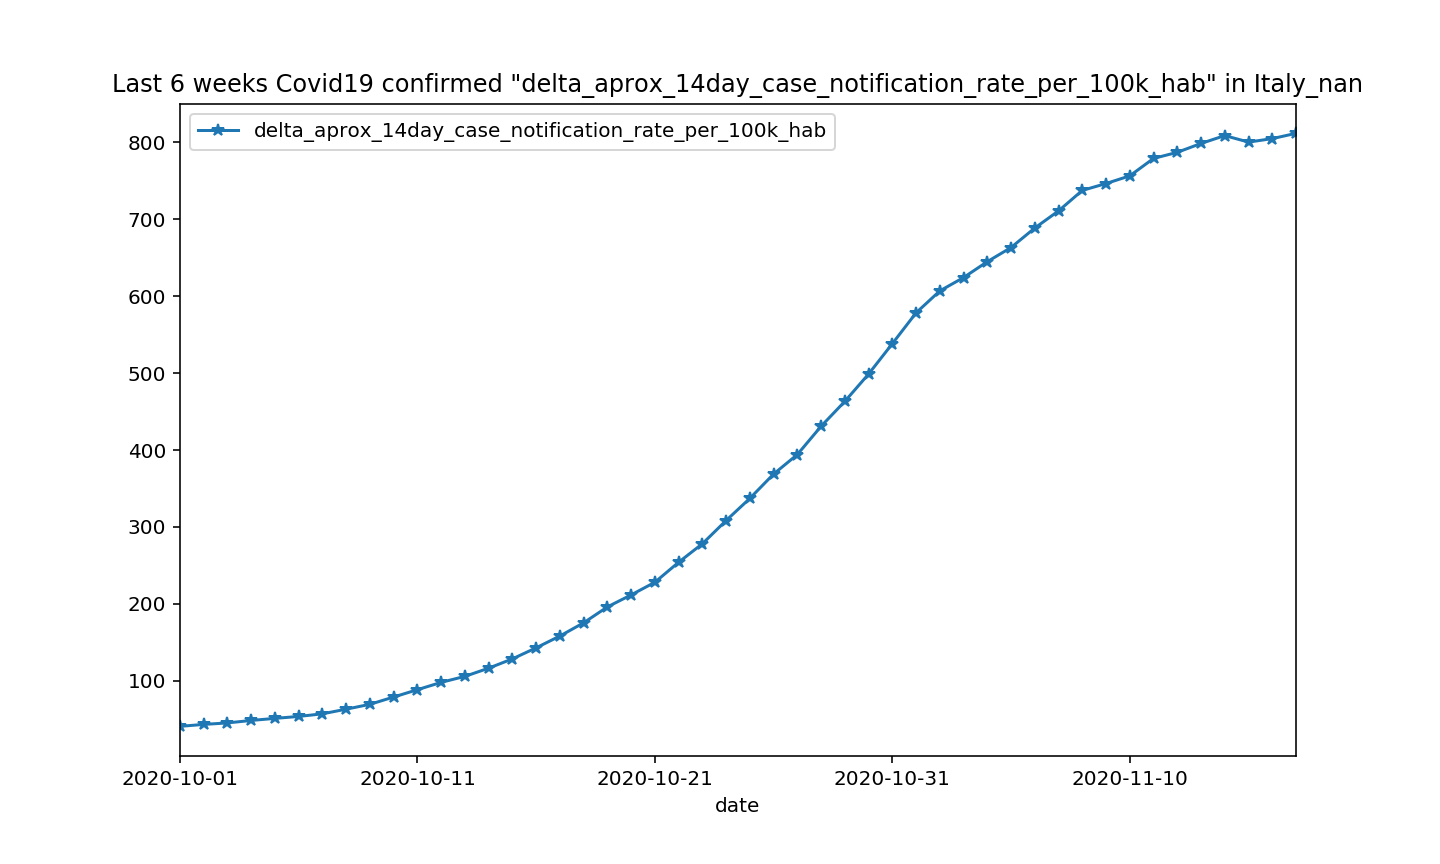

In [30]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


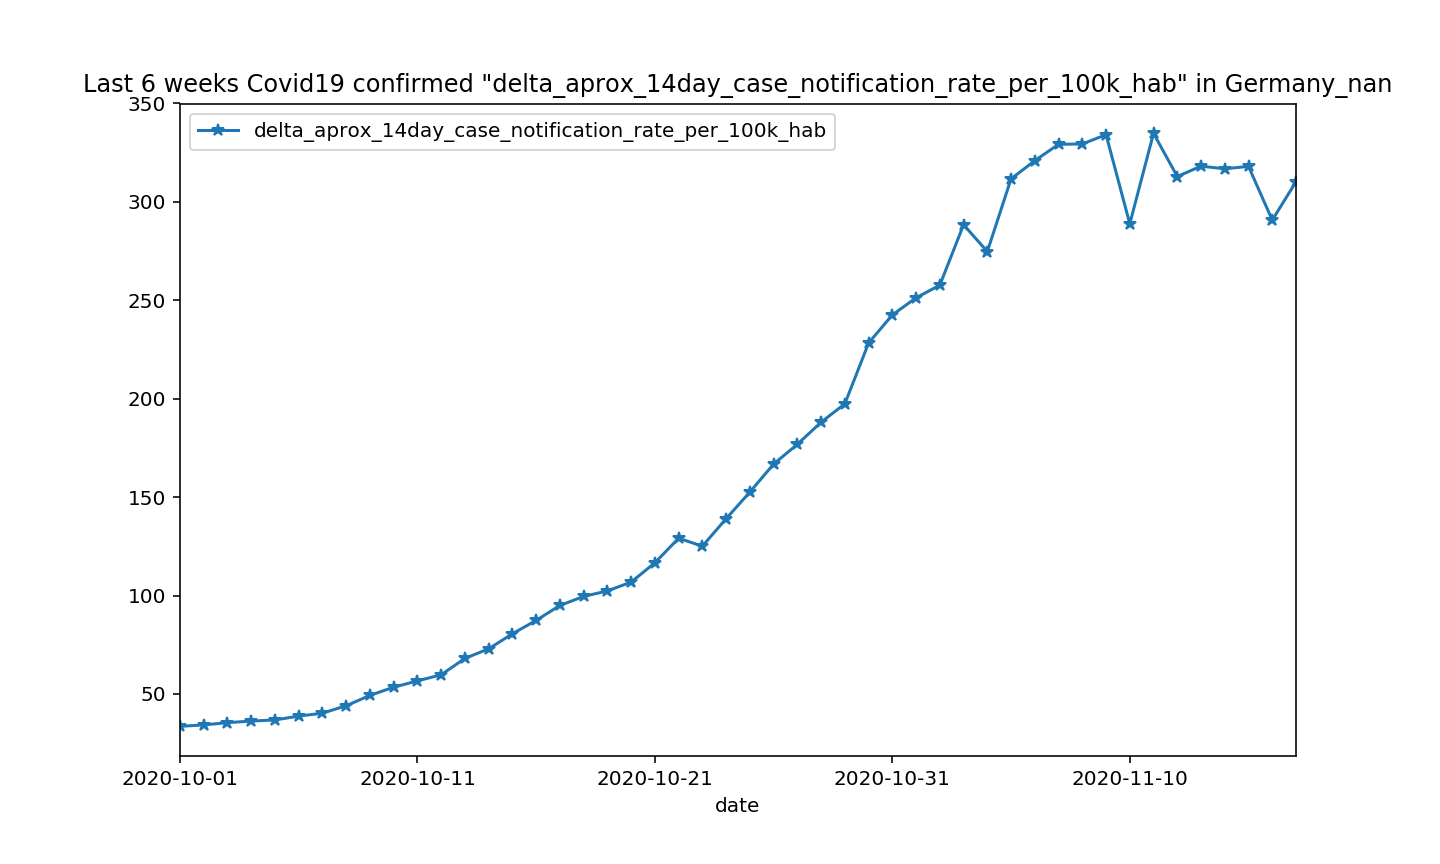

In [31]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


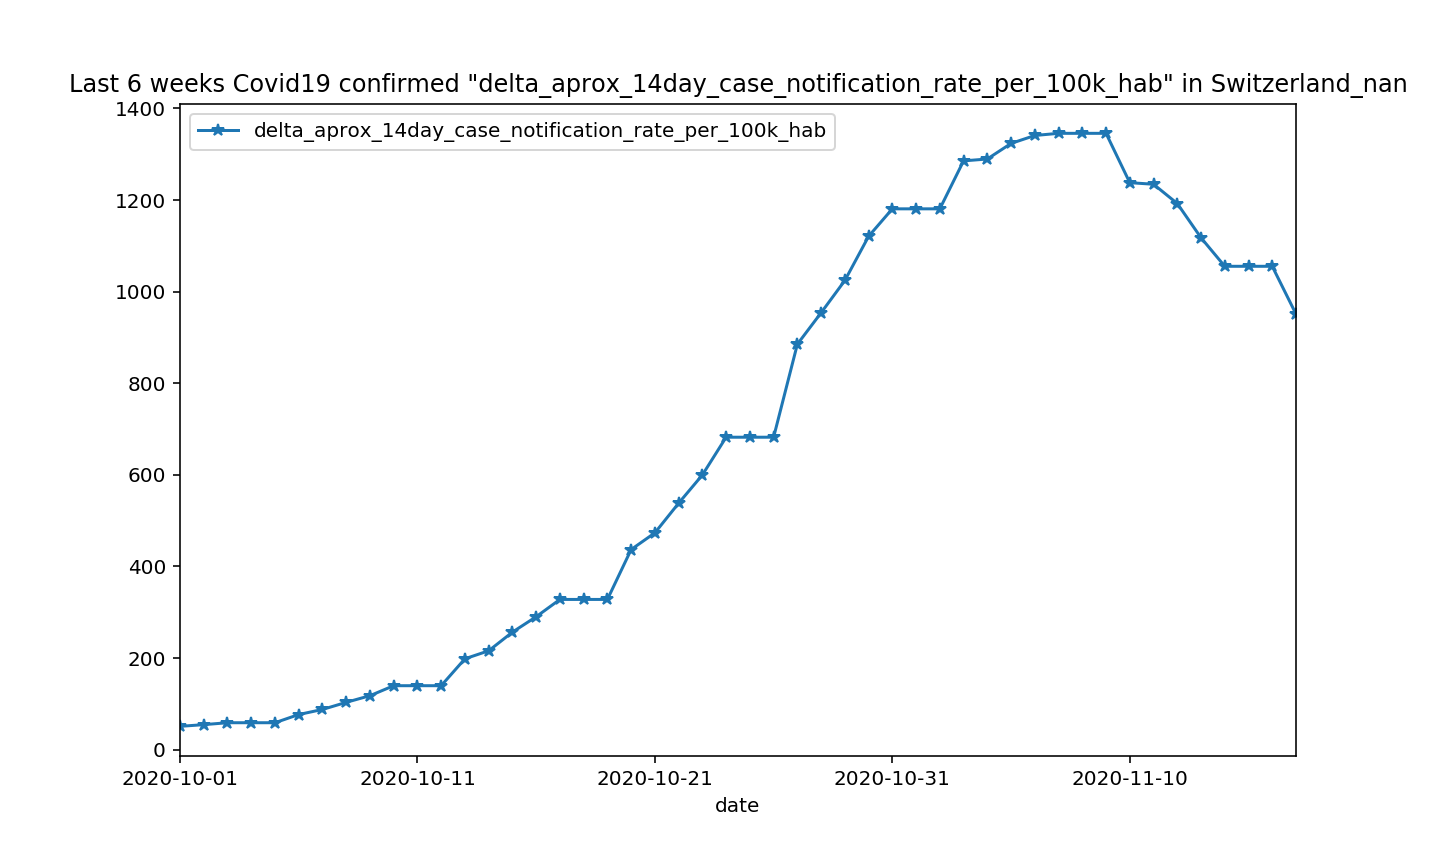

In [32]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


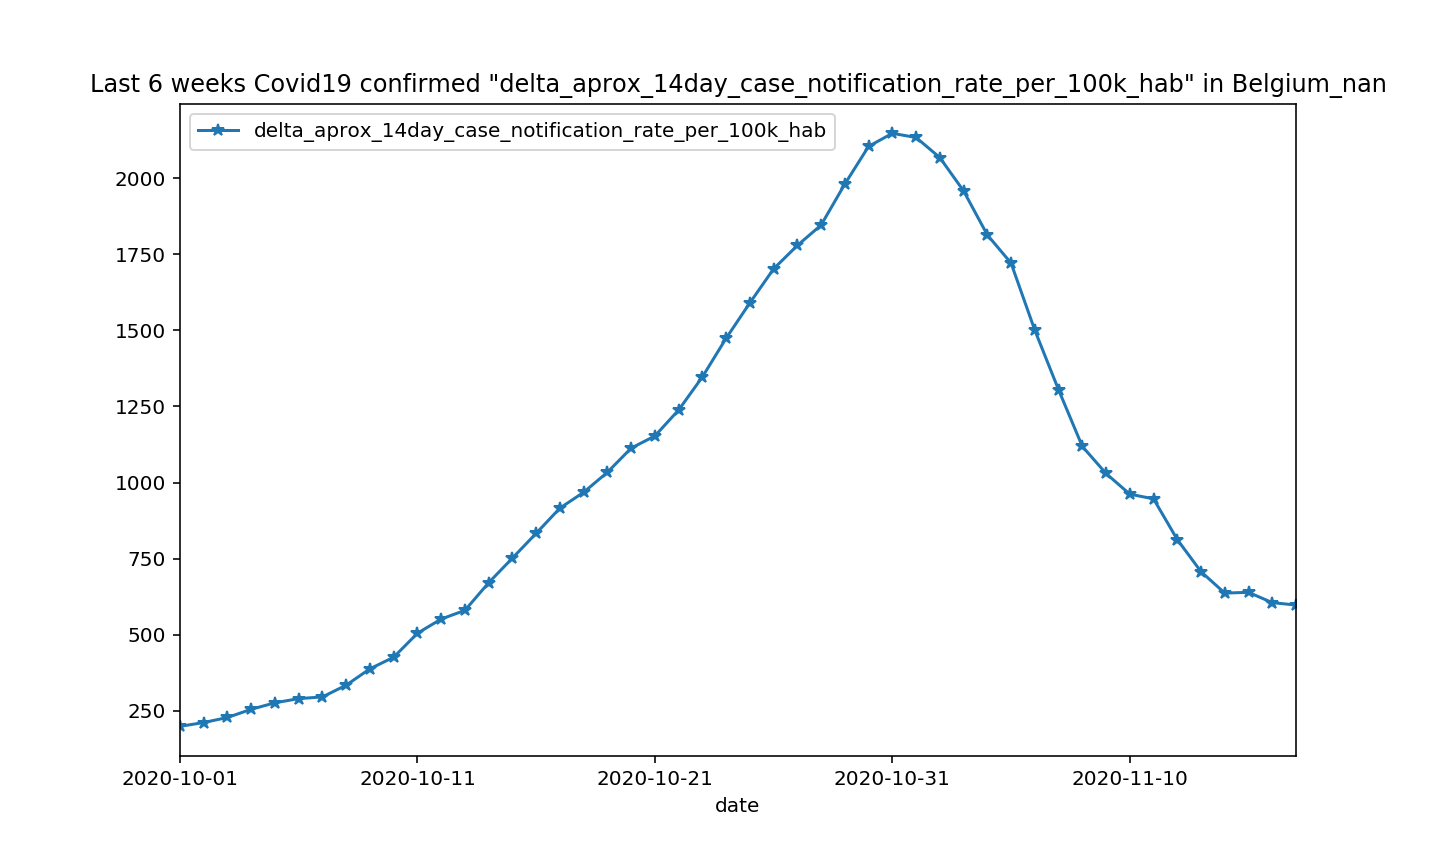

In [33]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


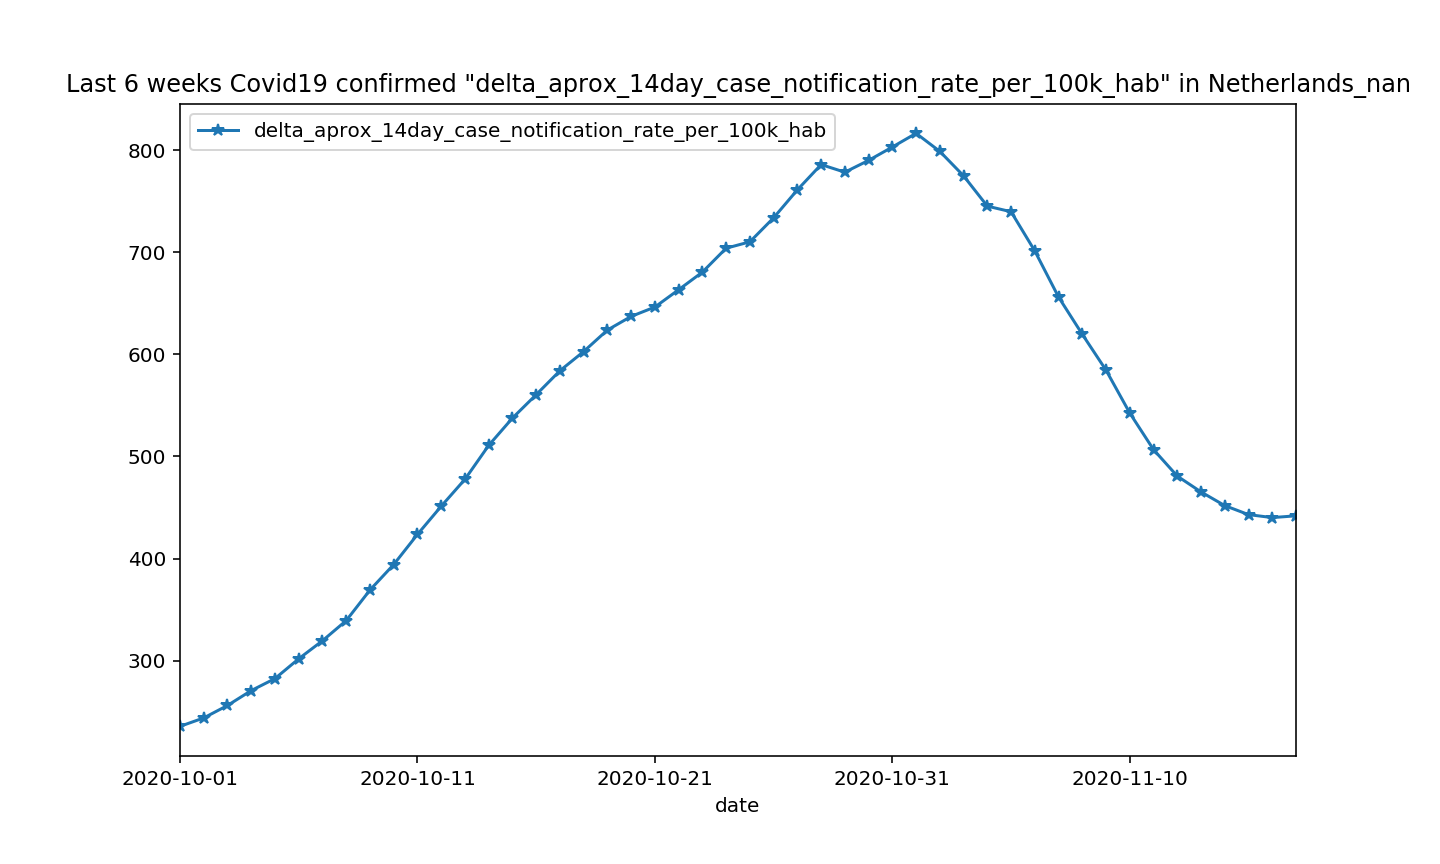

In [34]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


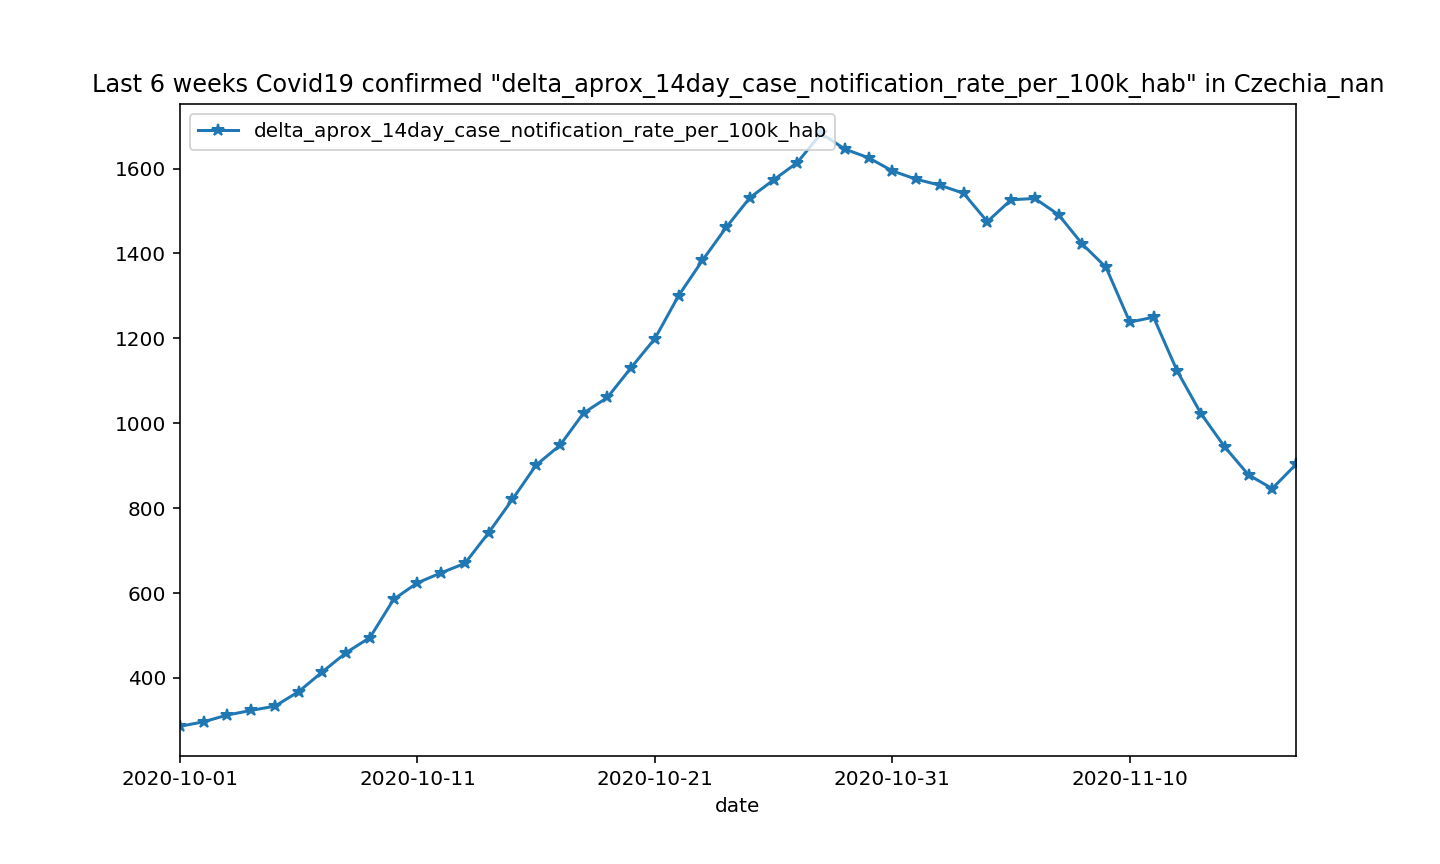

In [35]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


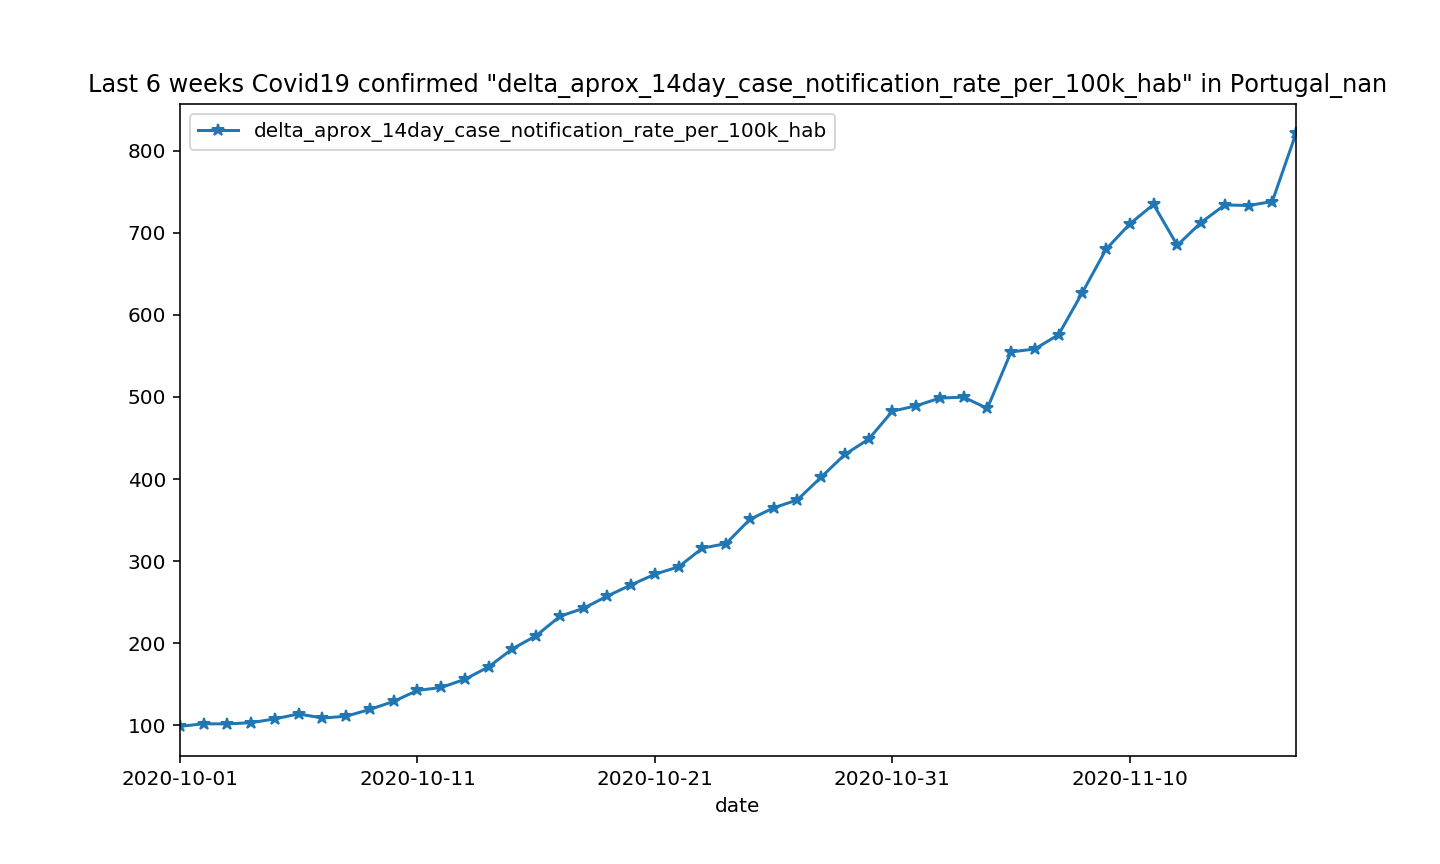

In [36]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [37]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


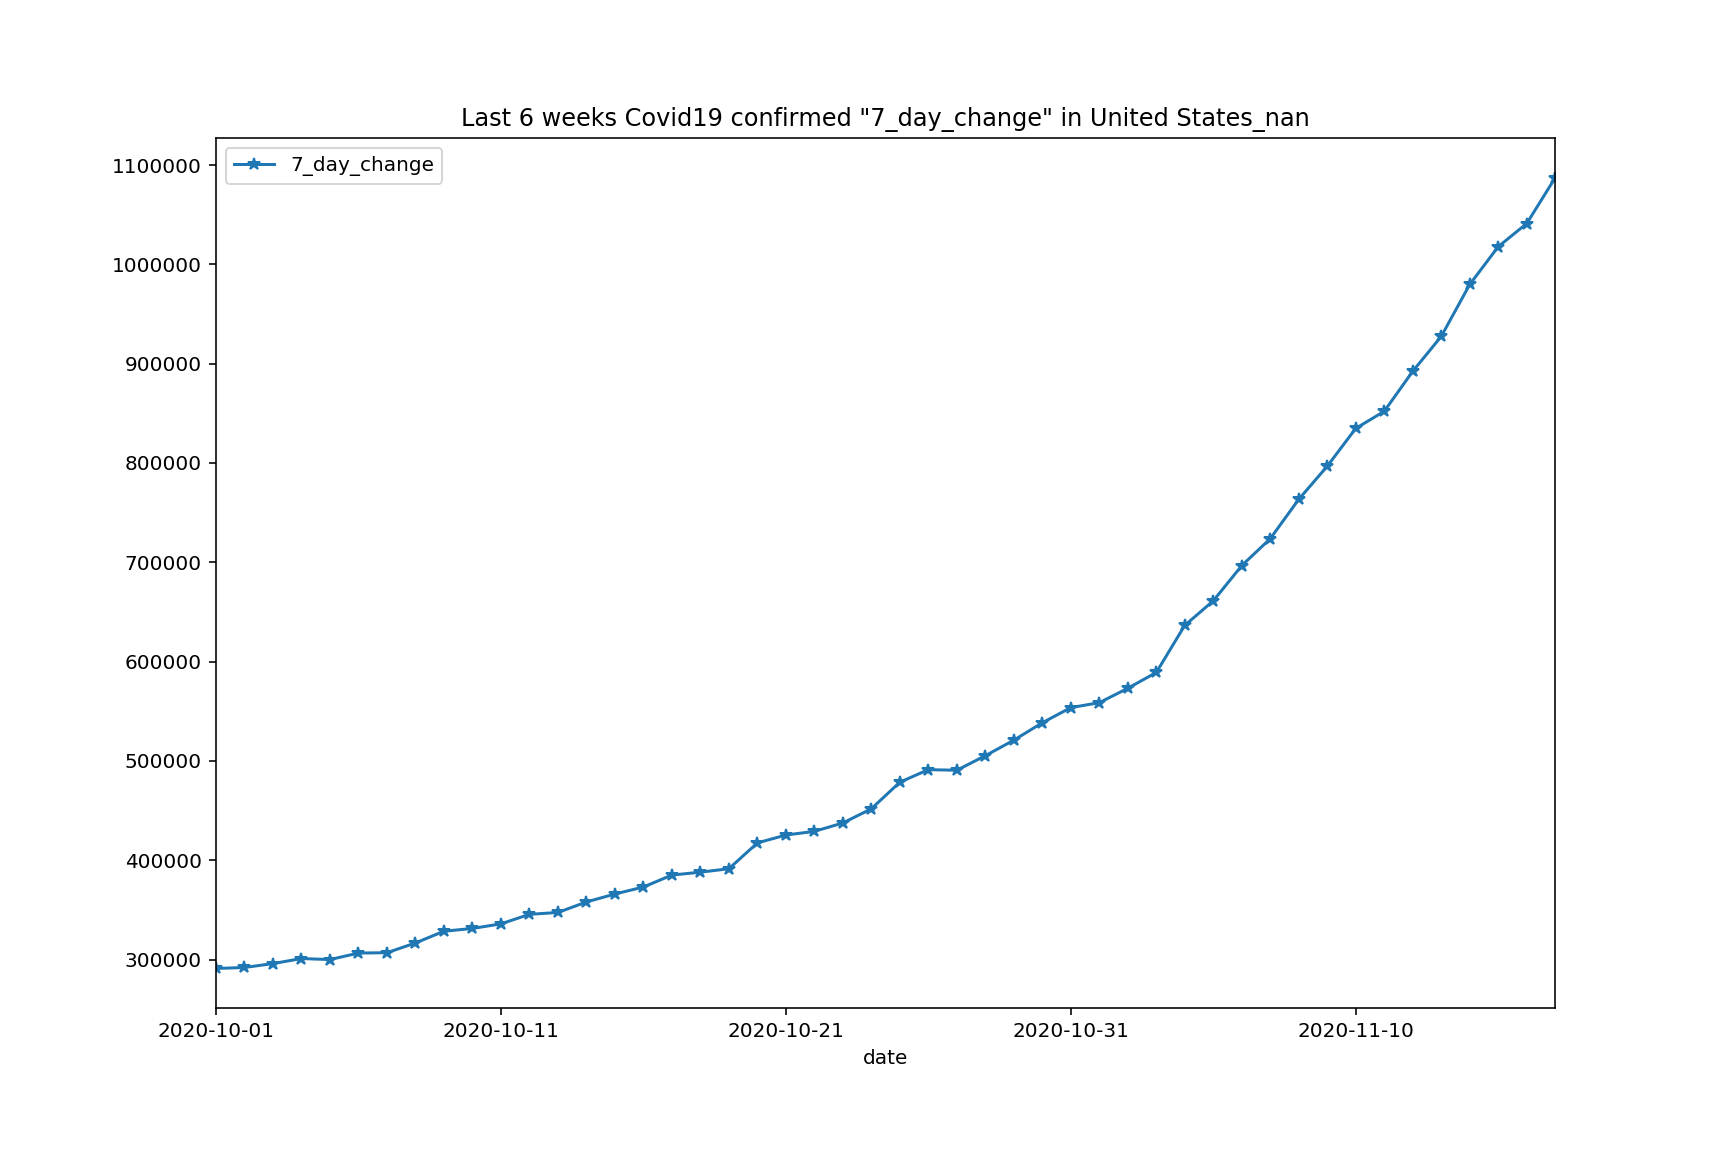

In [38]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


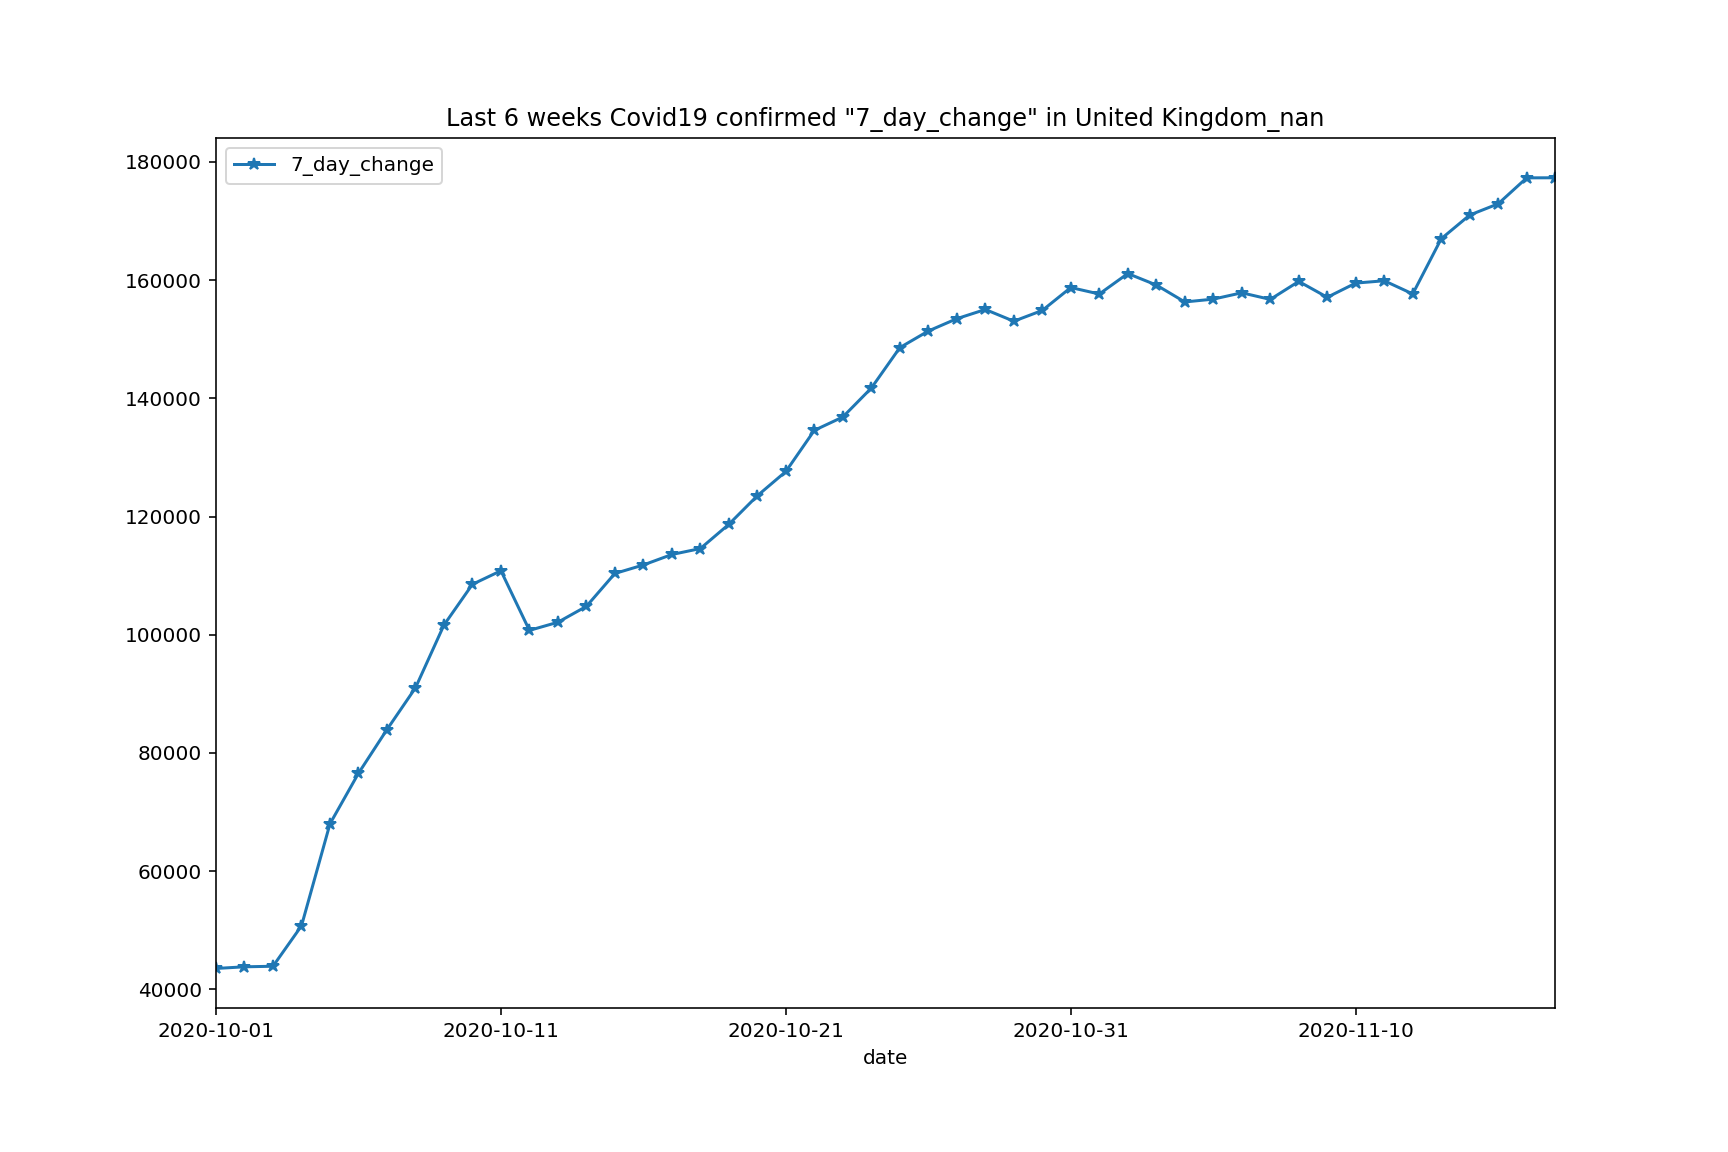

In [39]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


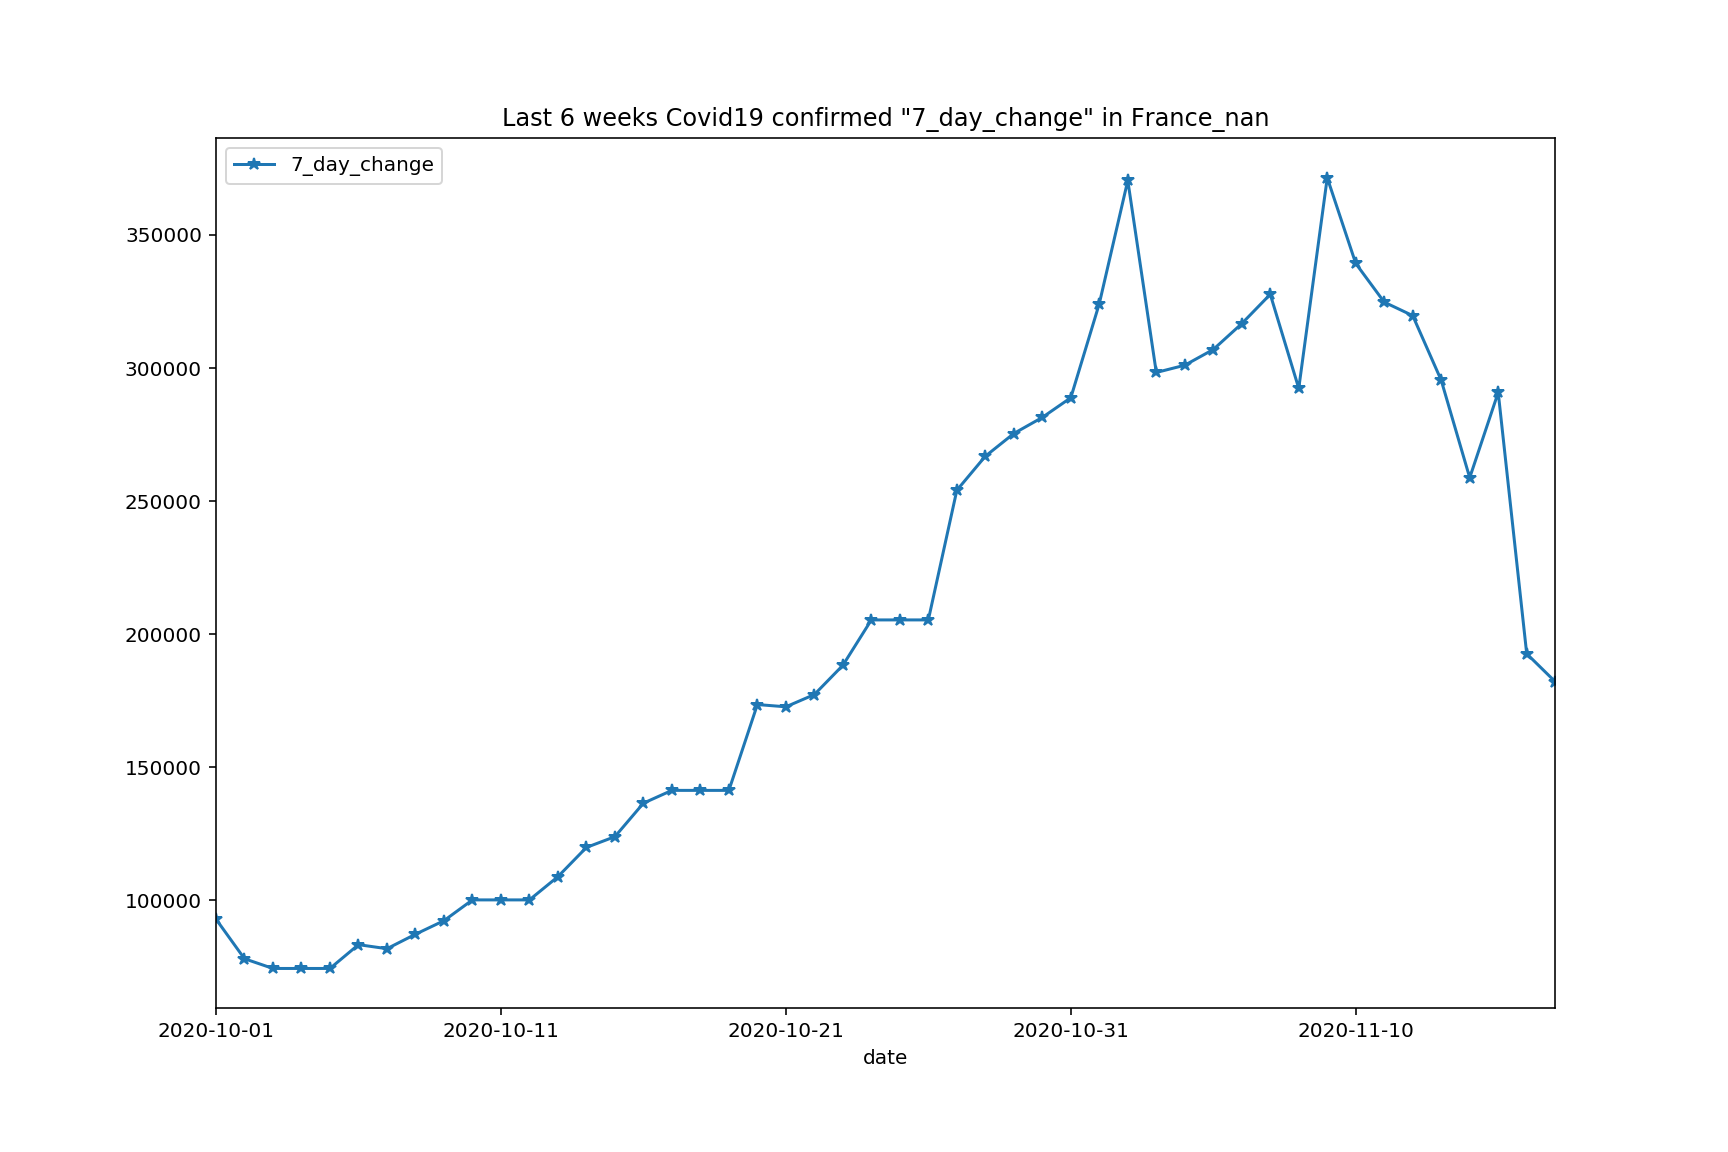

In [40]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


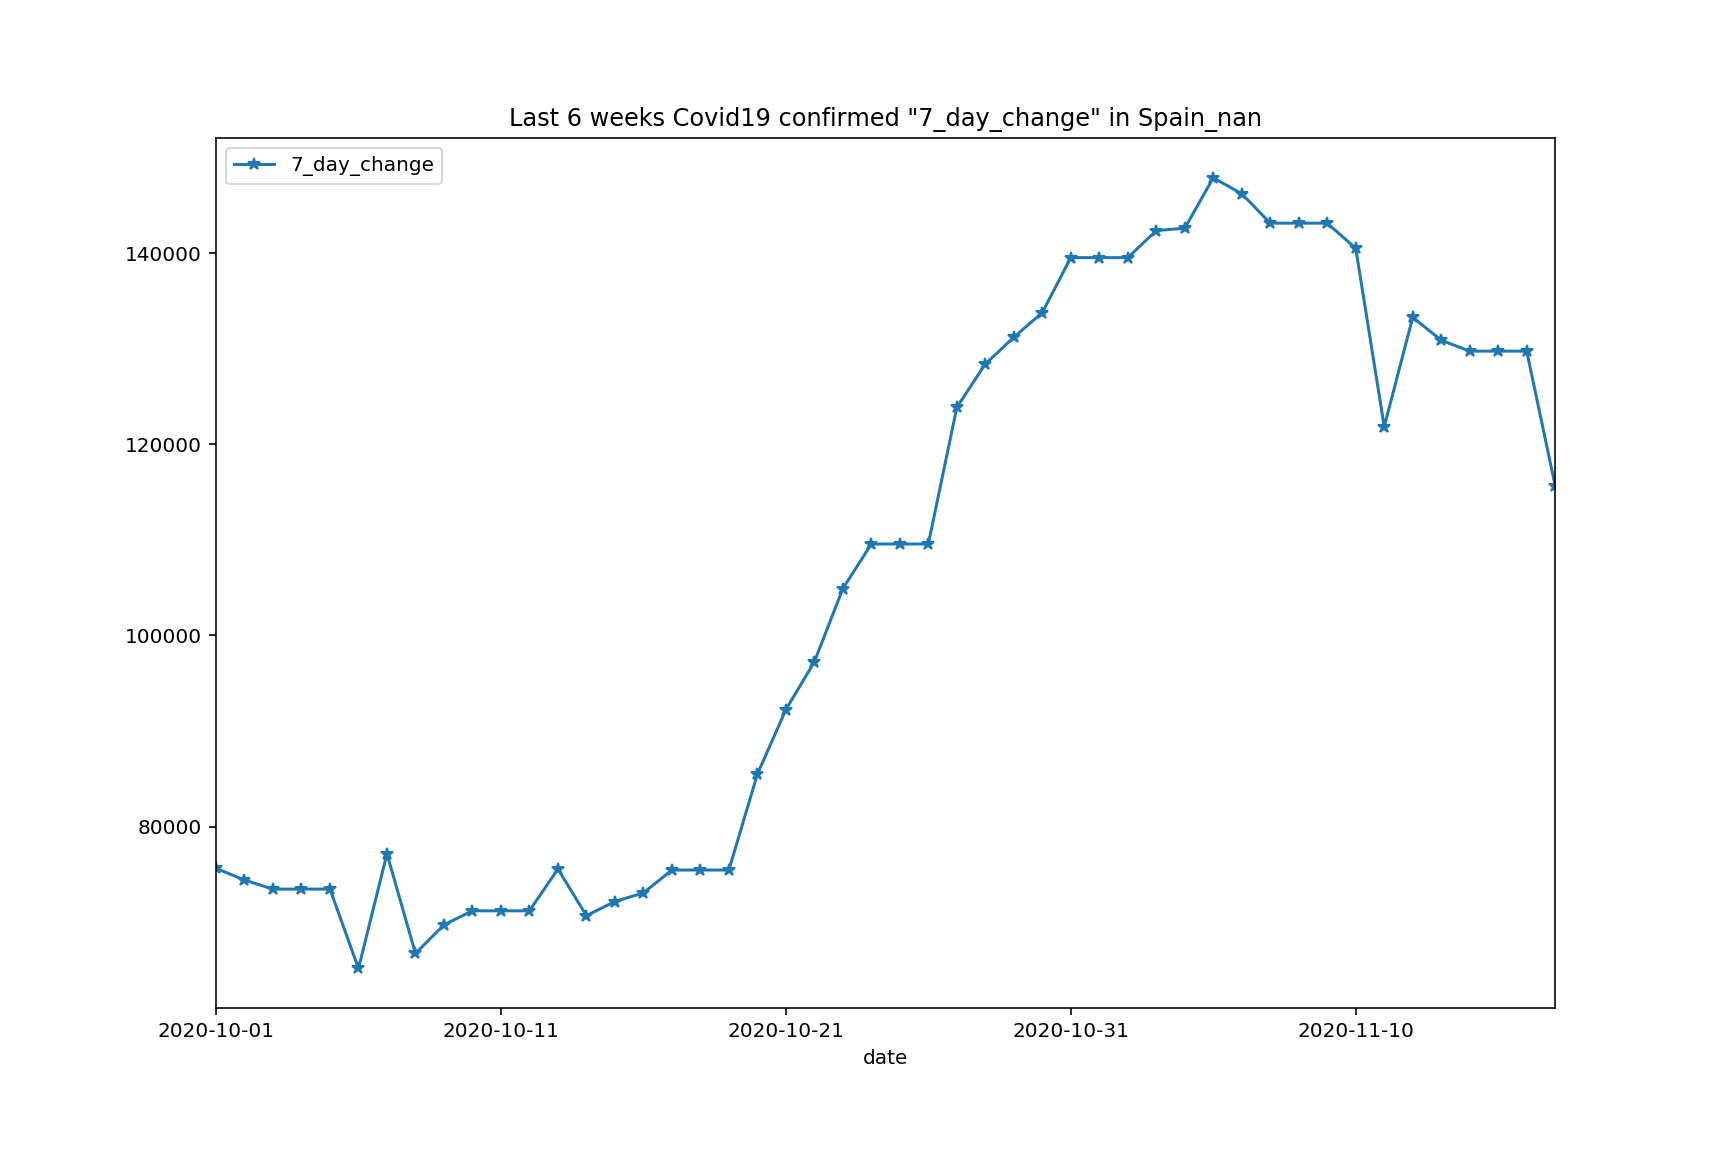

In [41]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


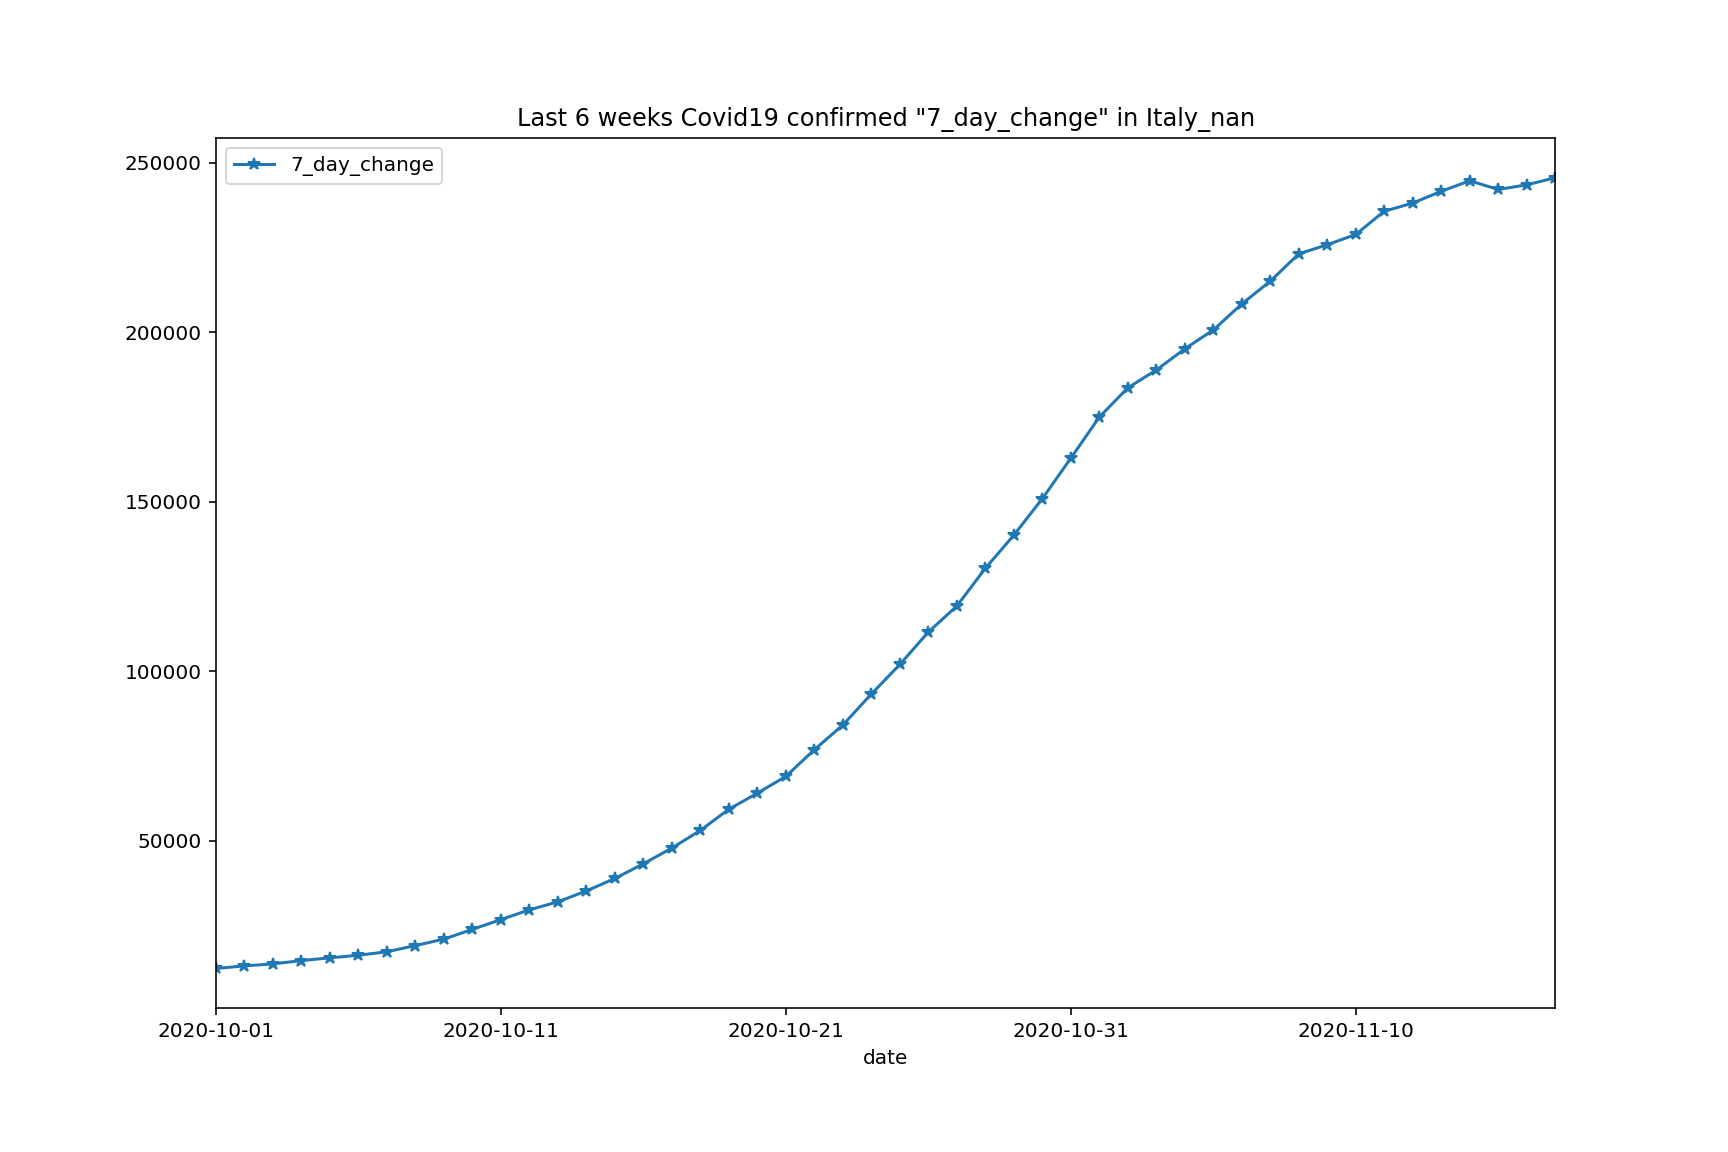

In [42]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


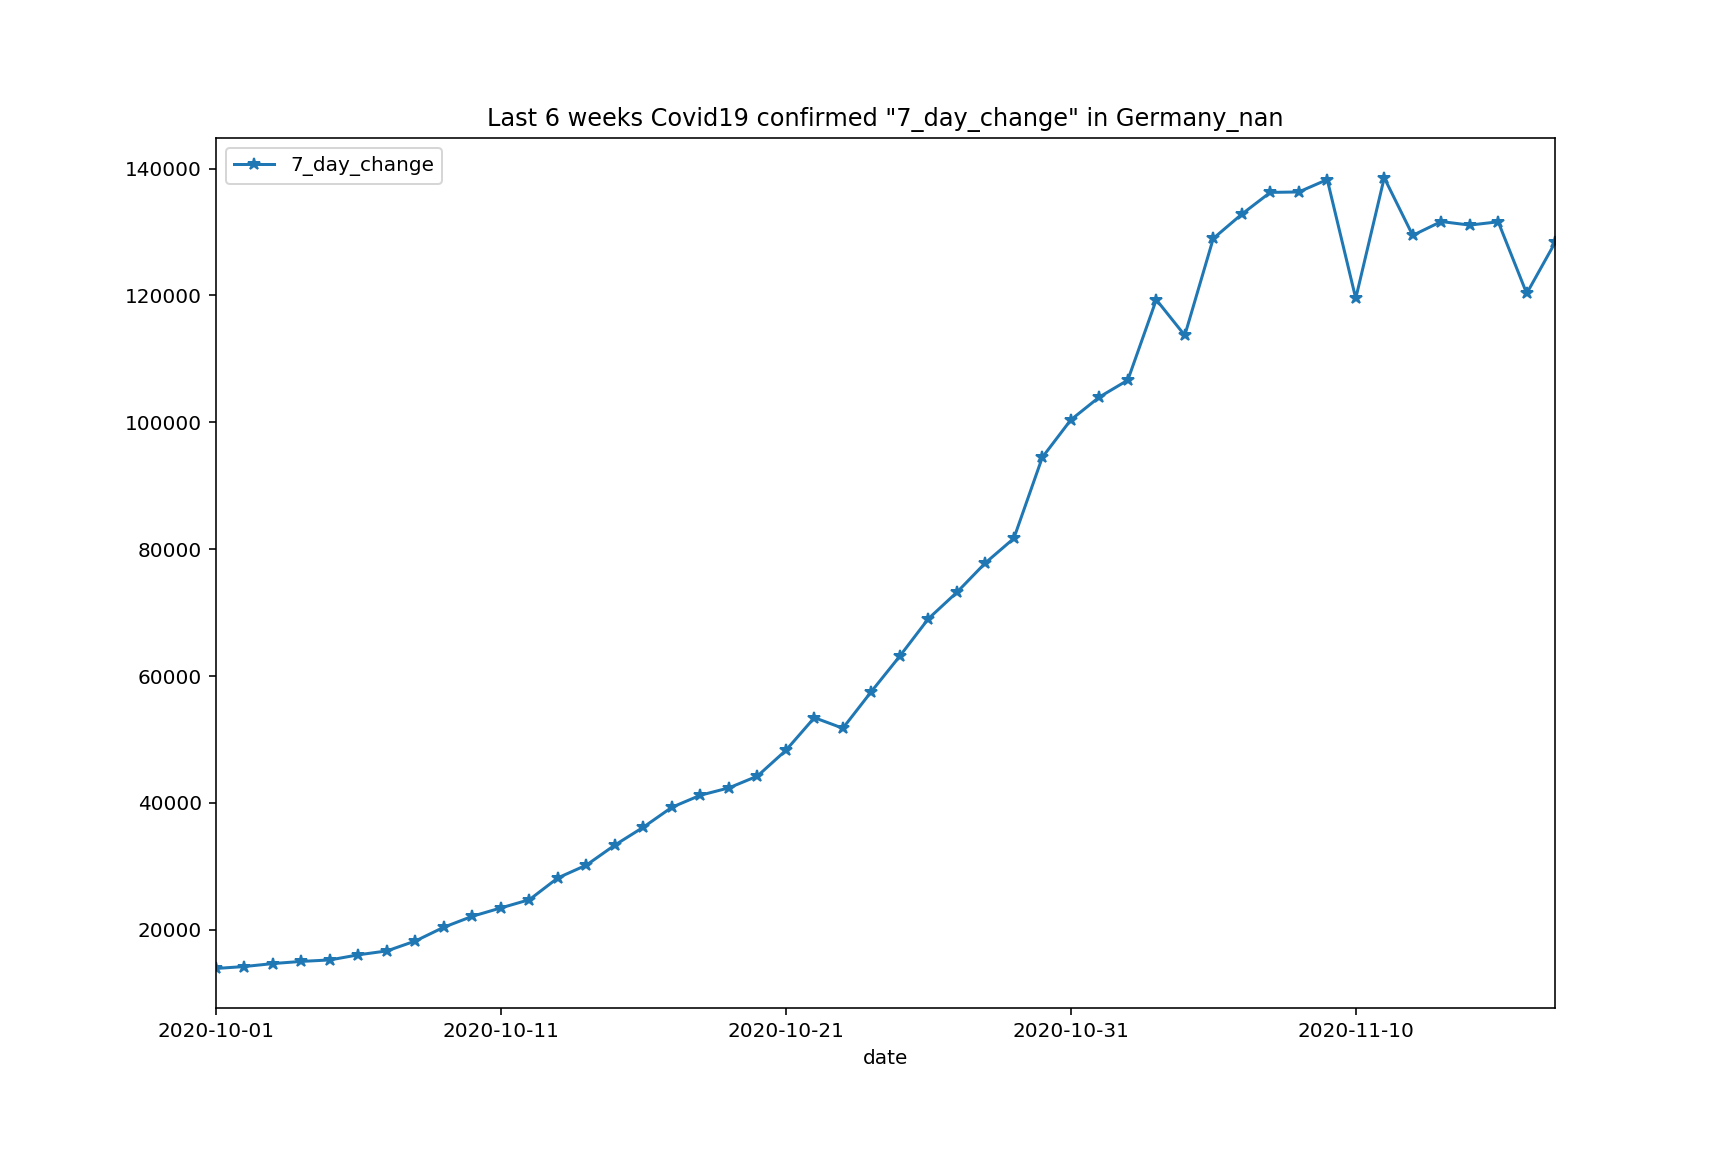

In [43]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


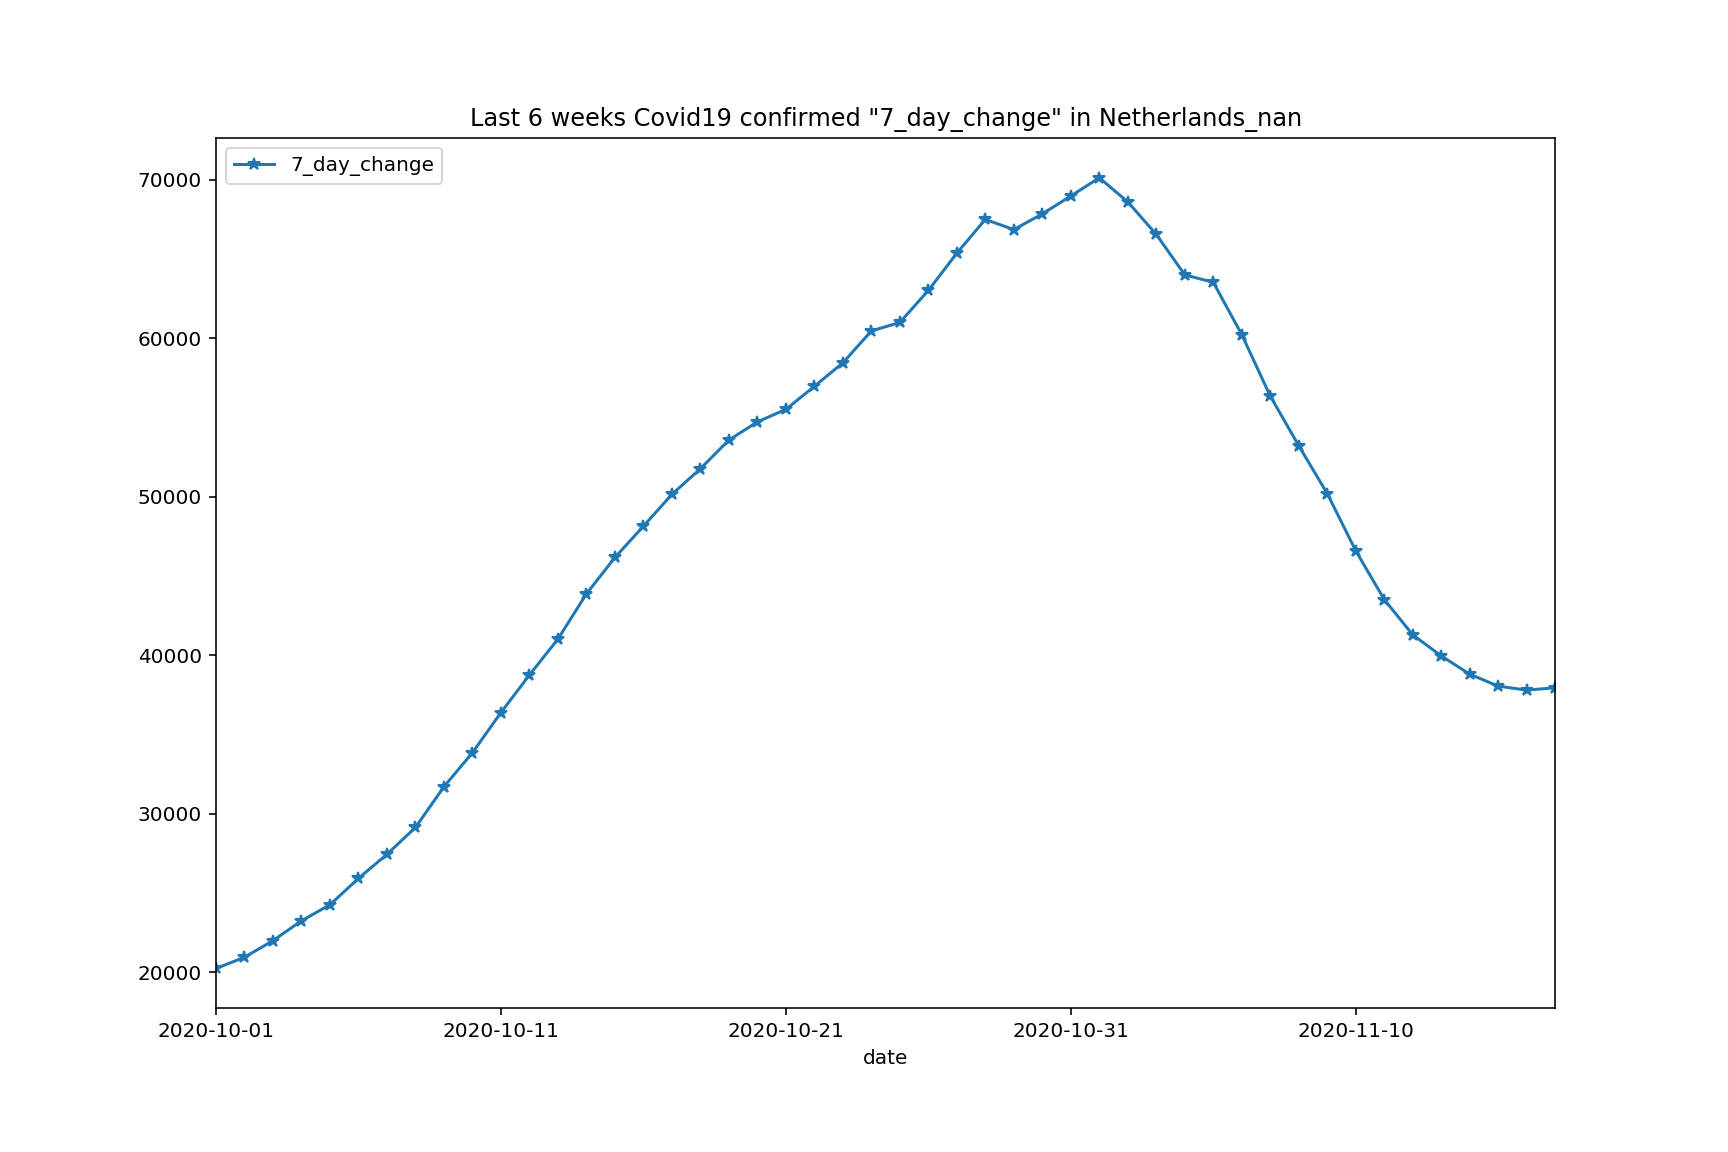

In [44]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


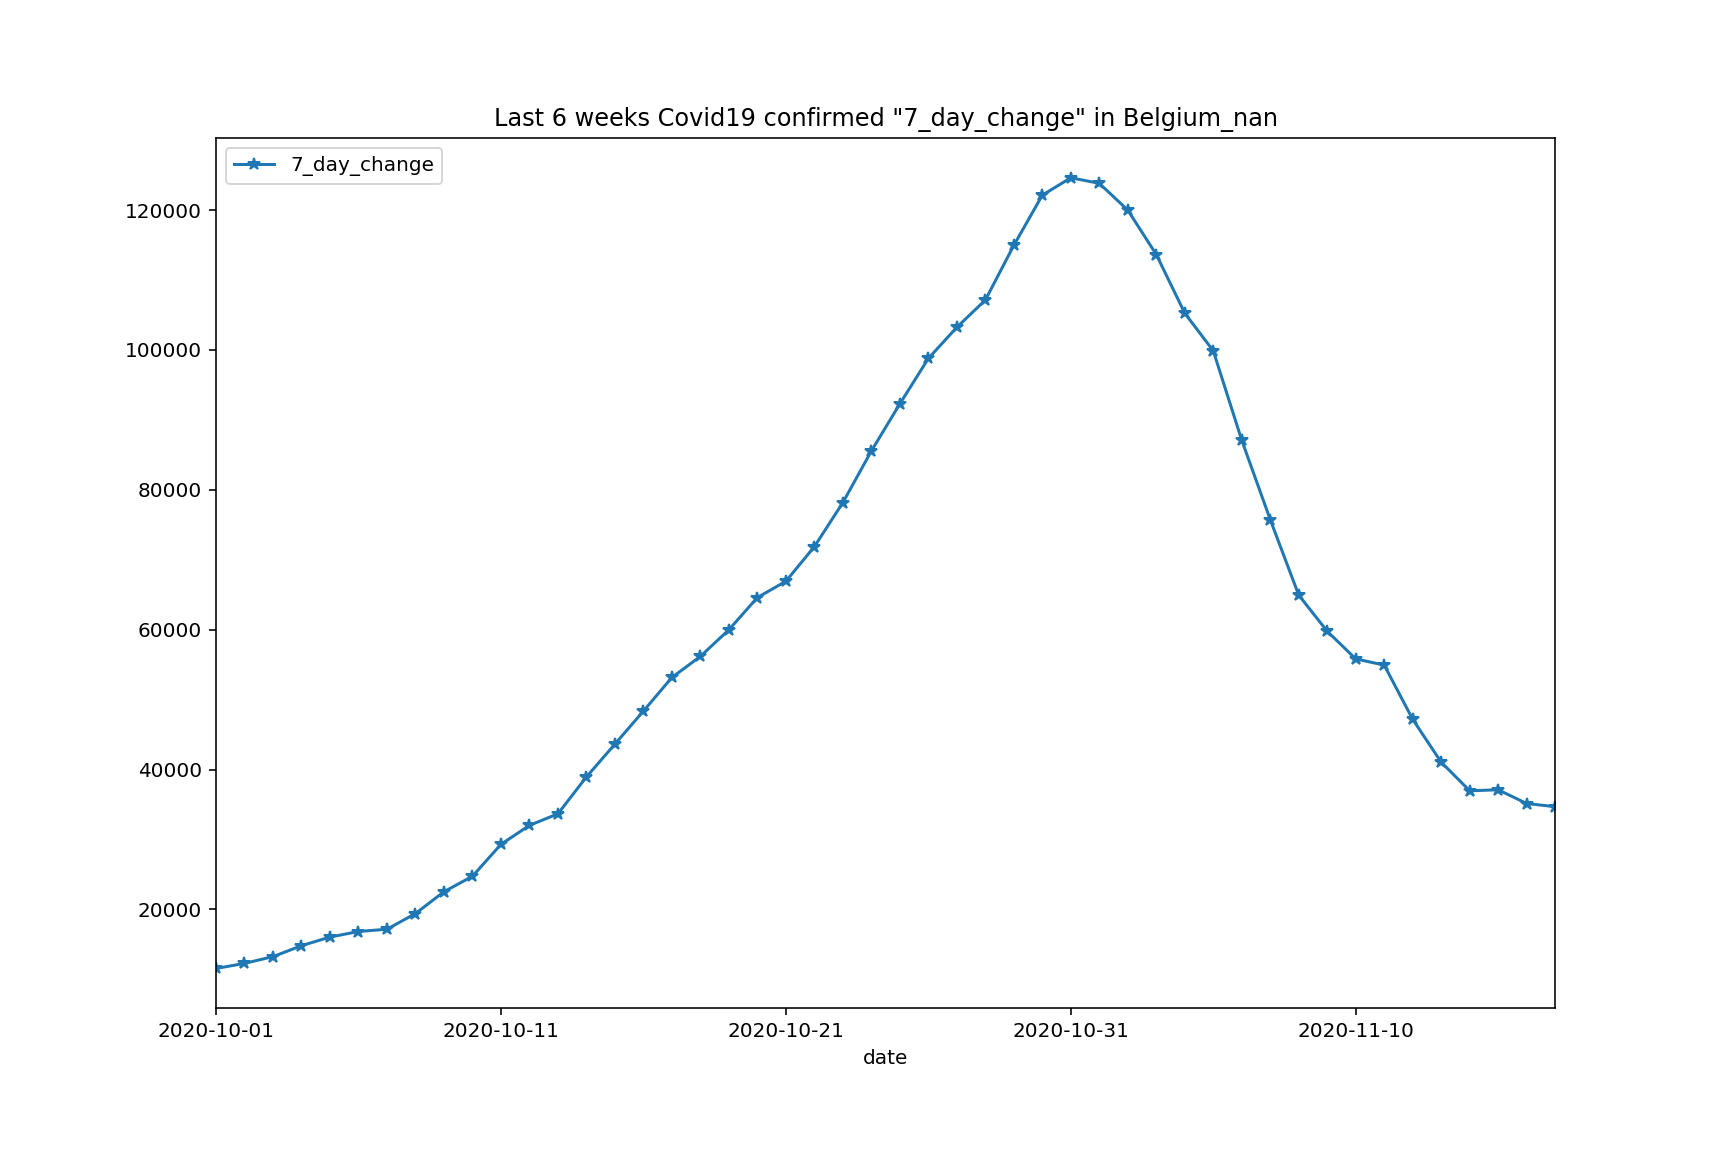

In [45]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


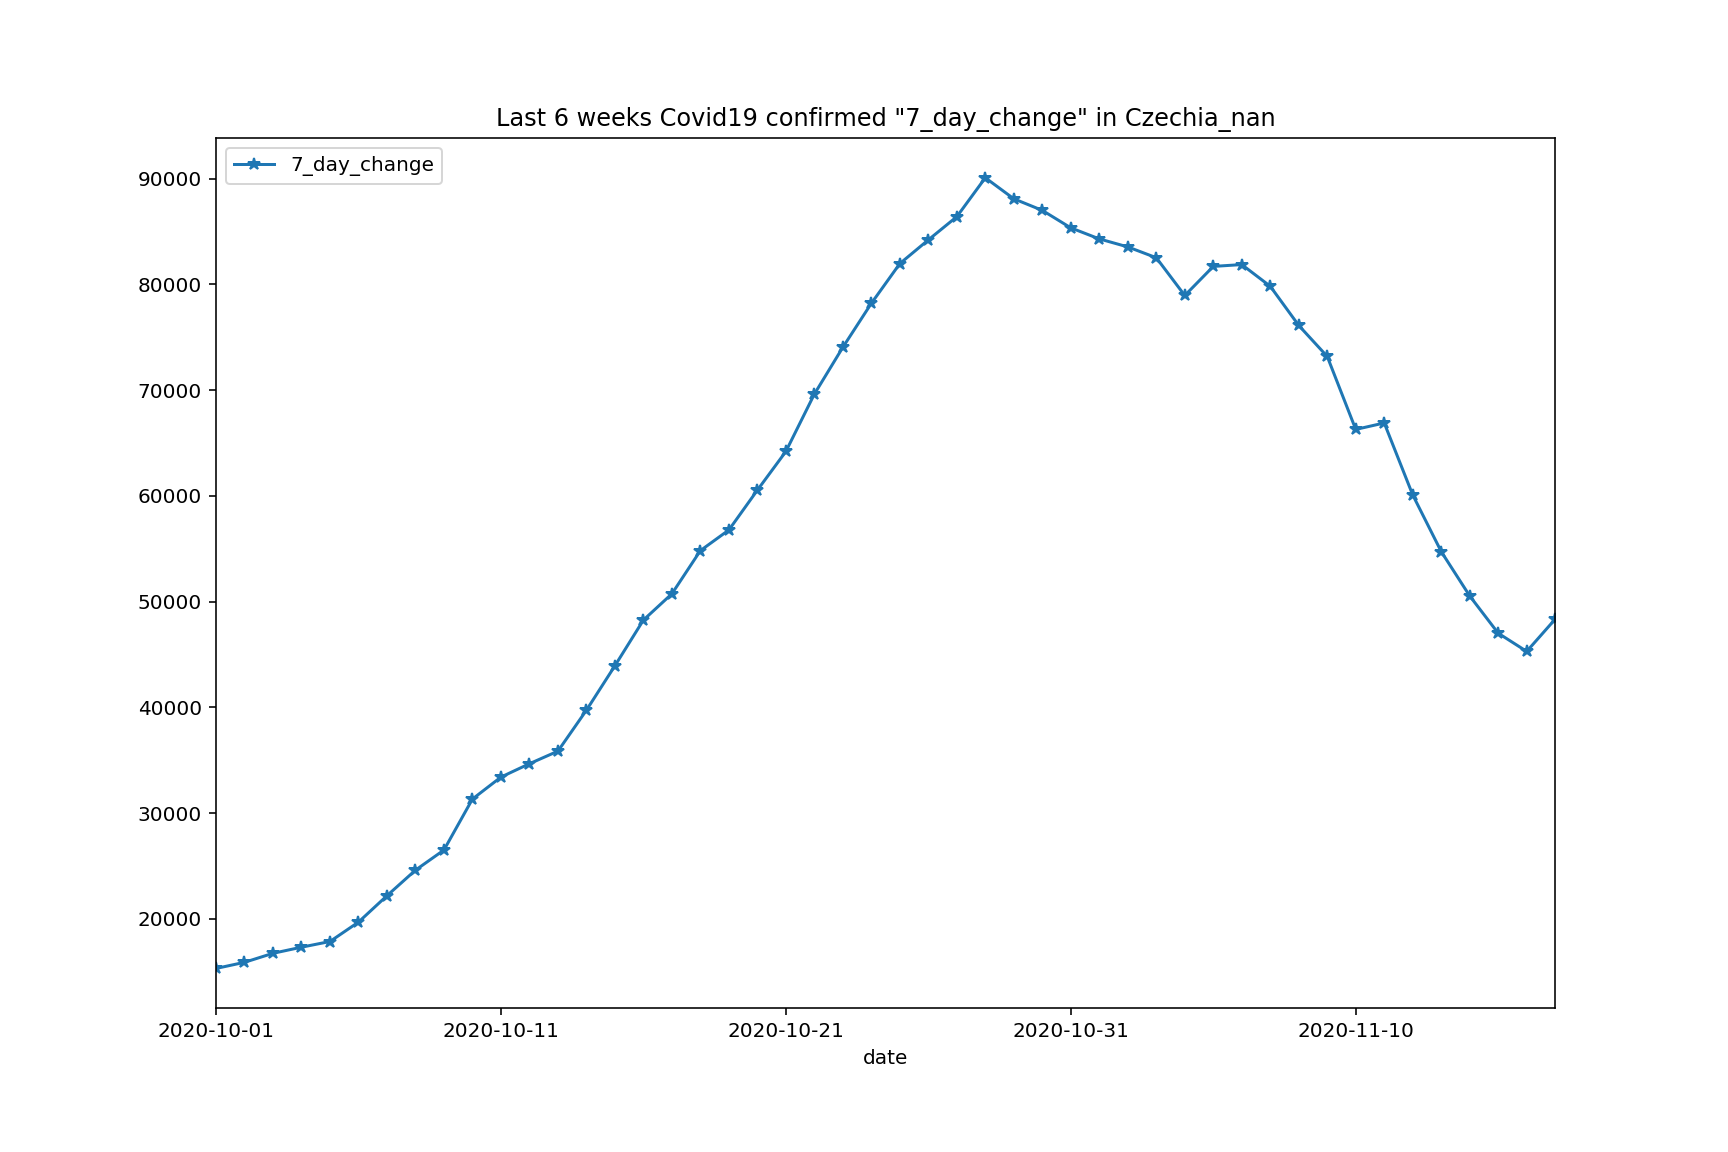

In [46]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


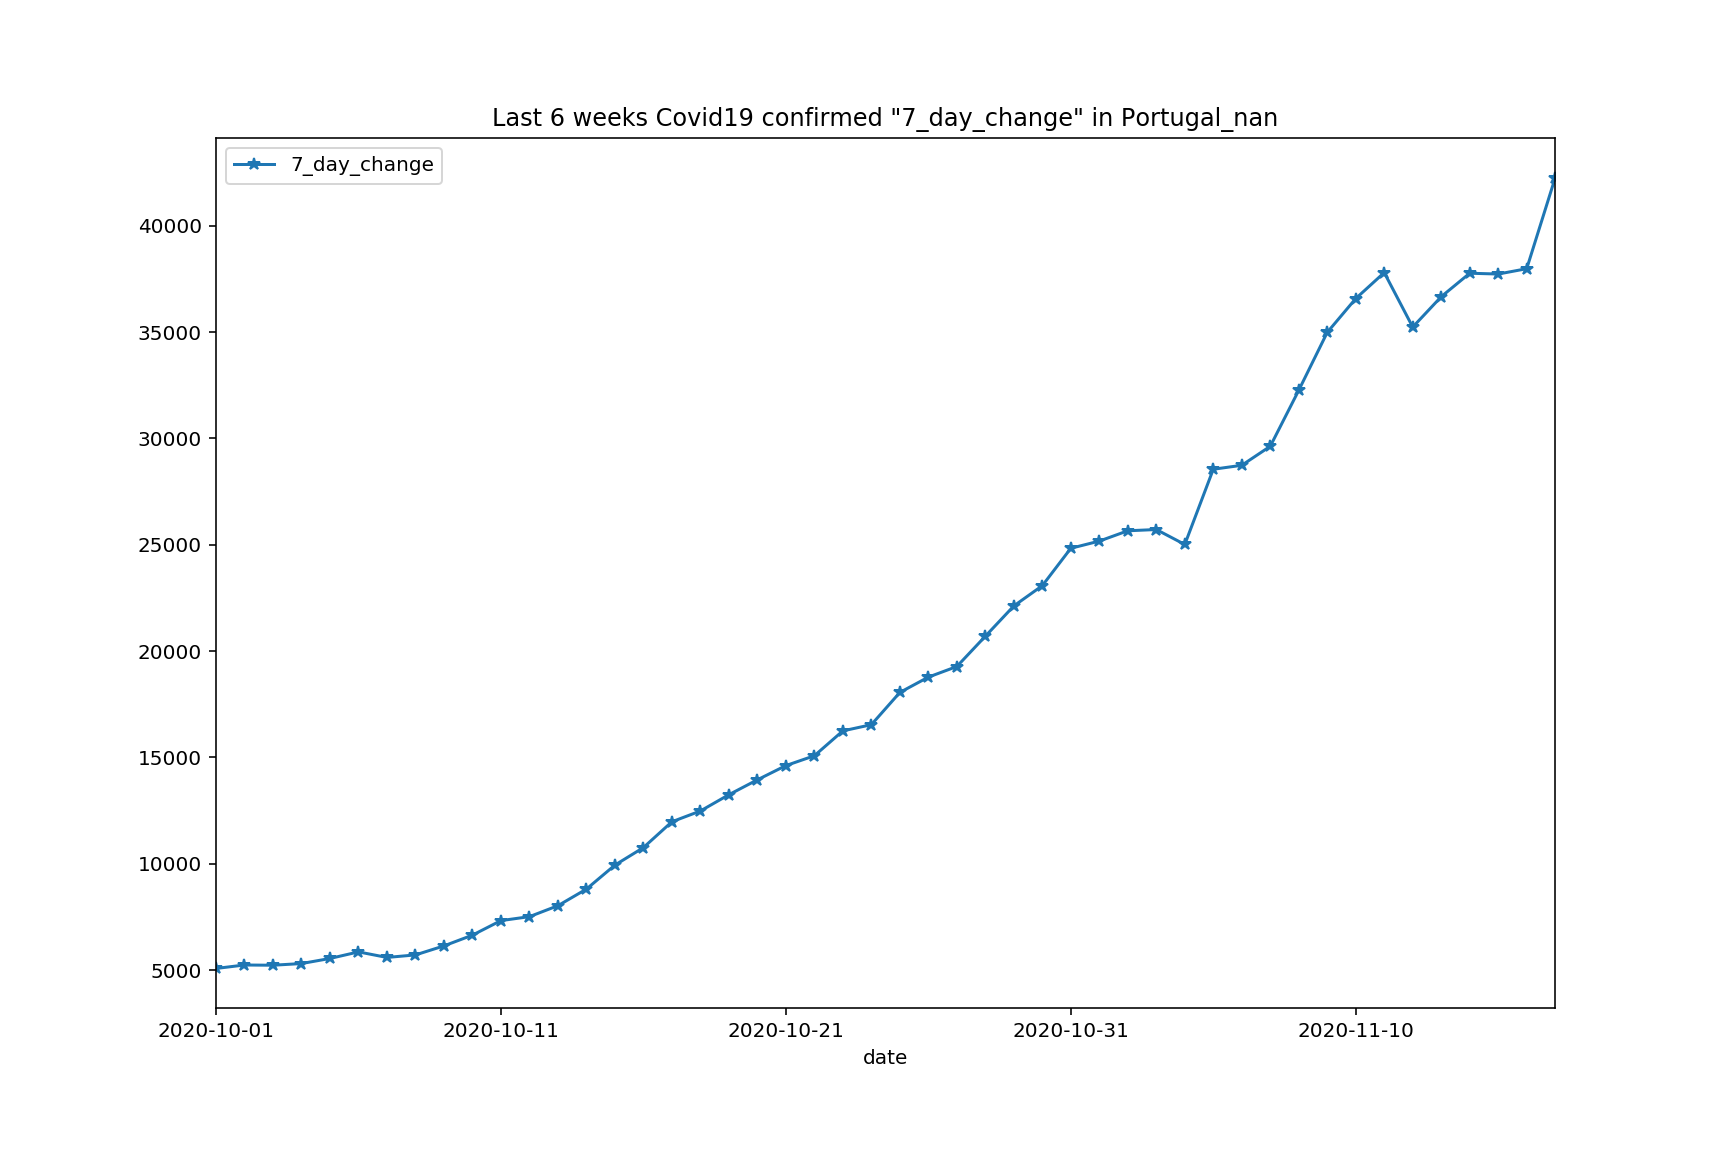

In [47]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [48]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


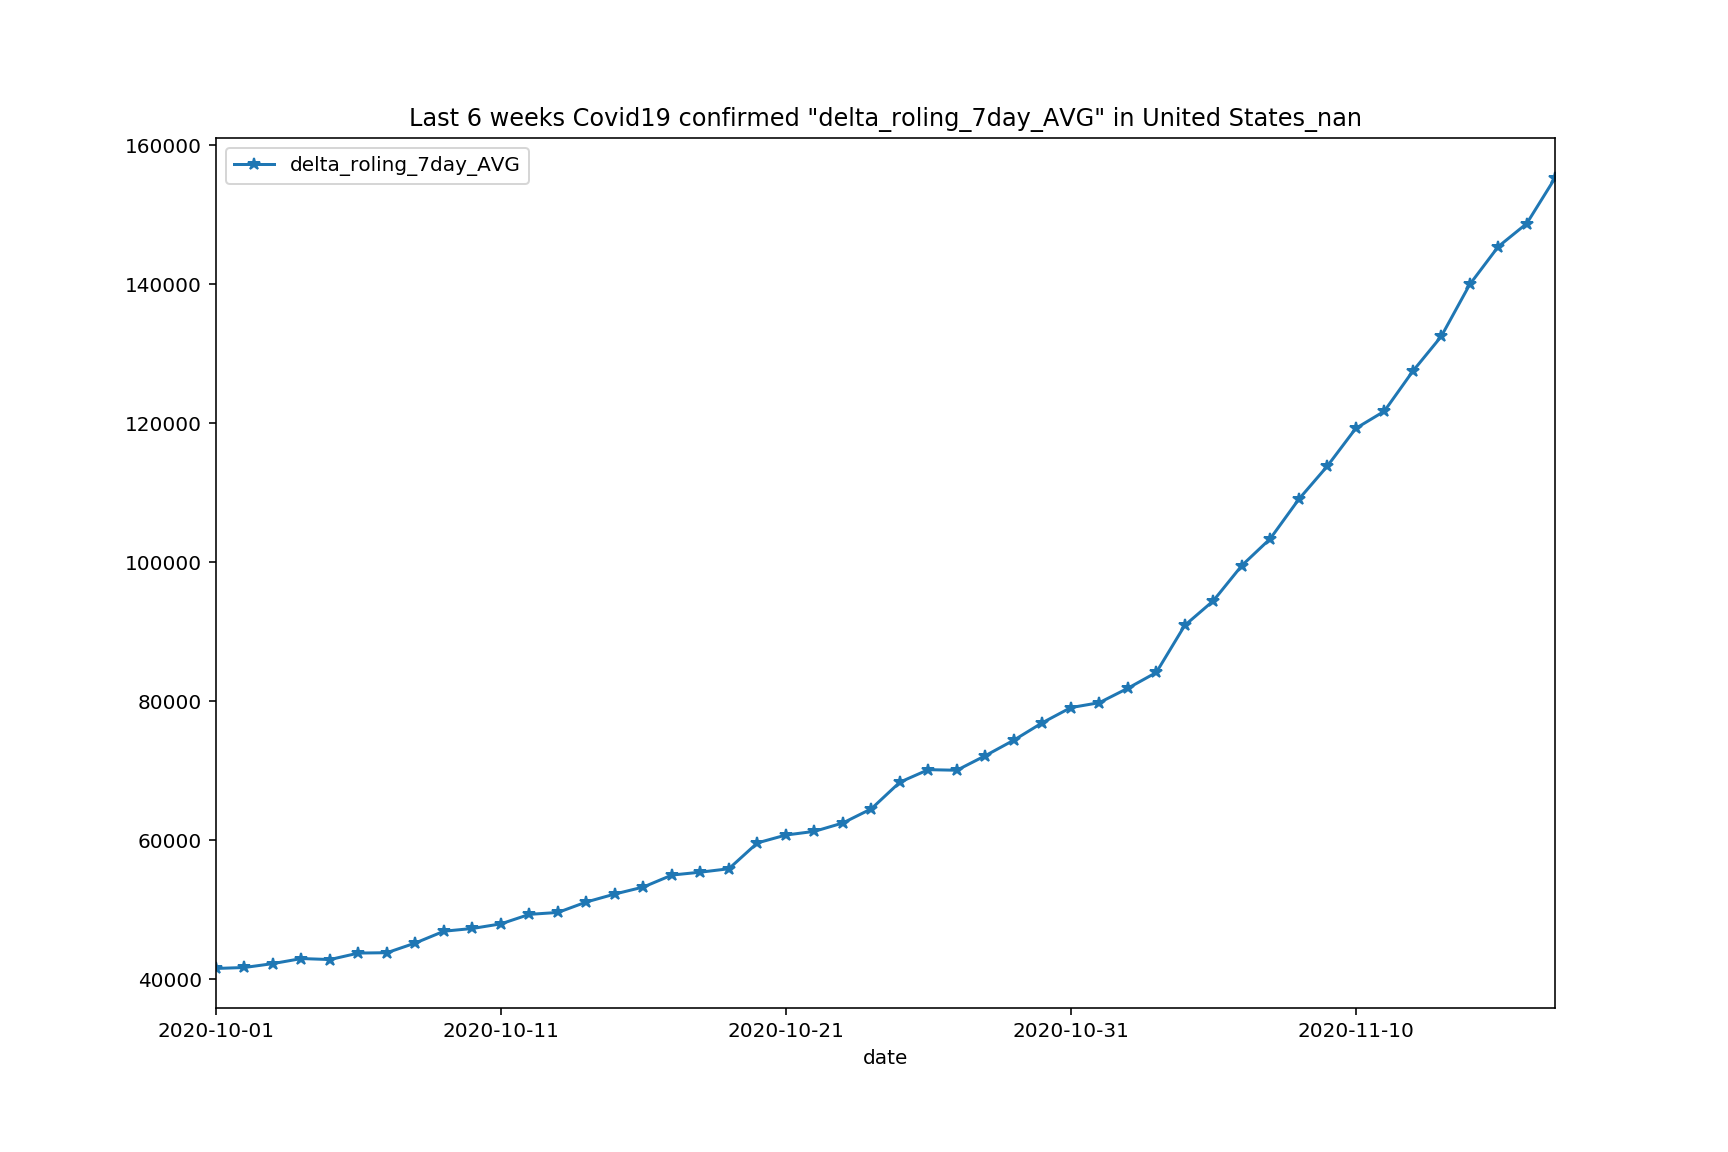

In [49]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


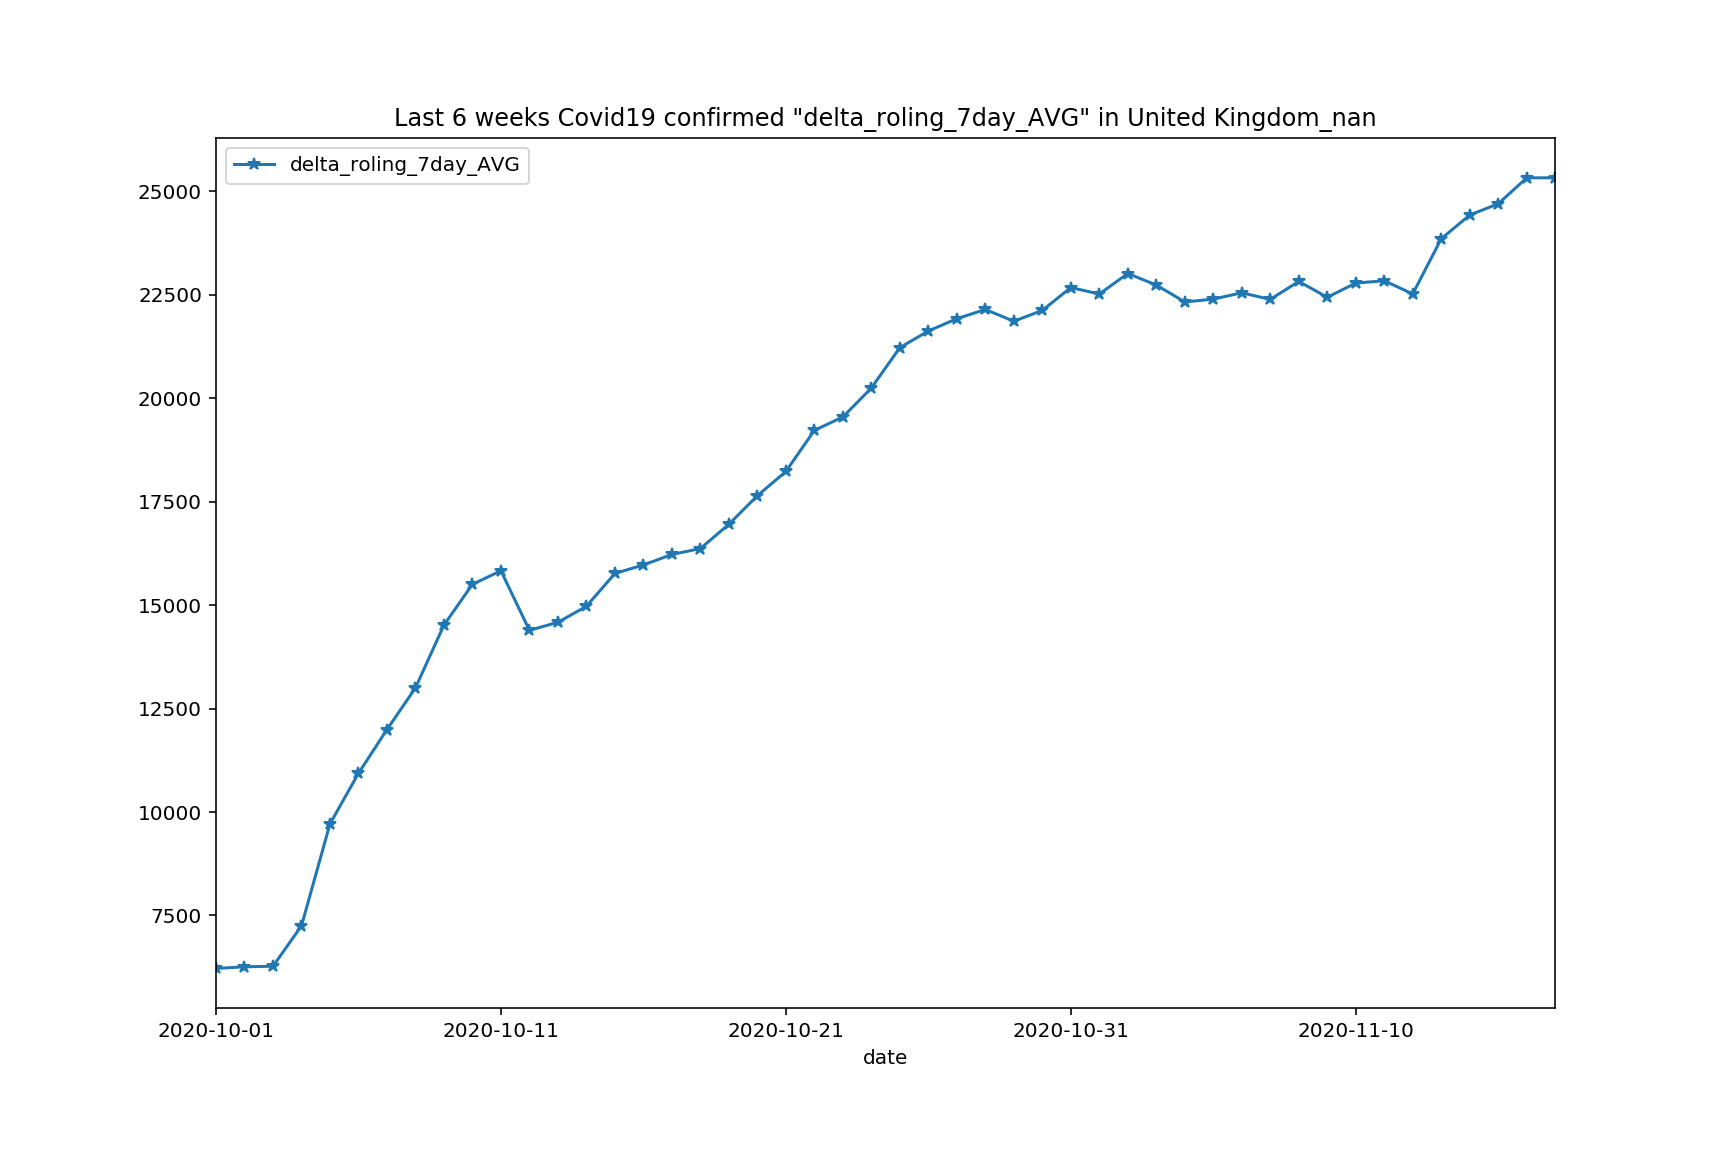

In [50]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


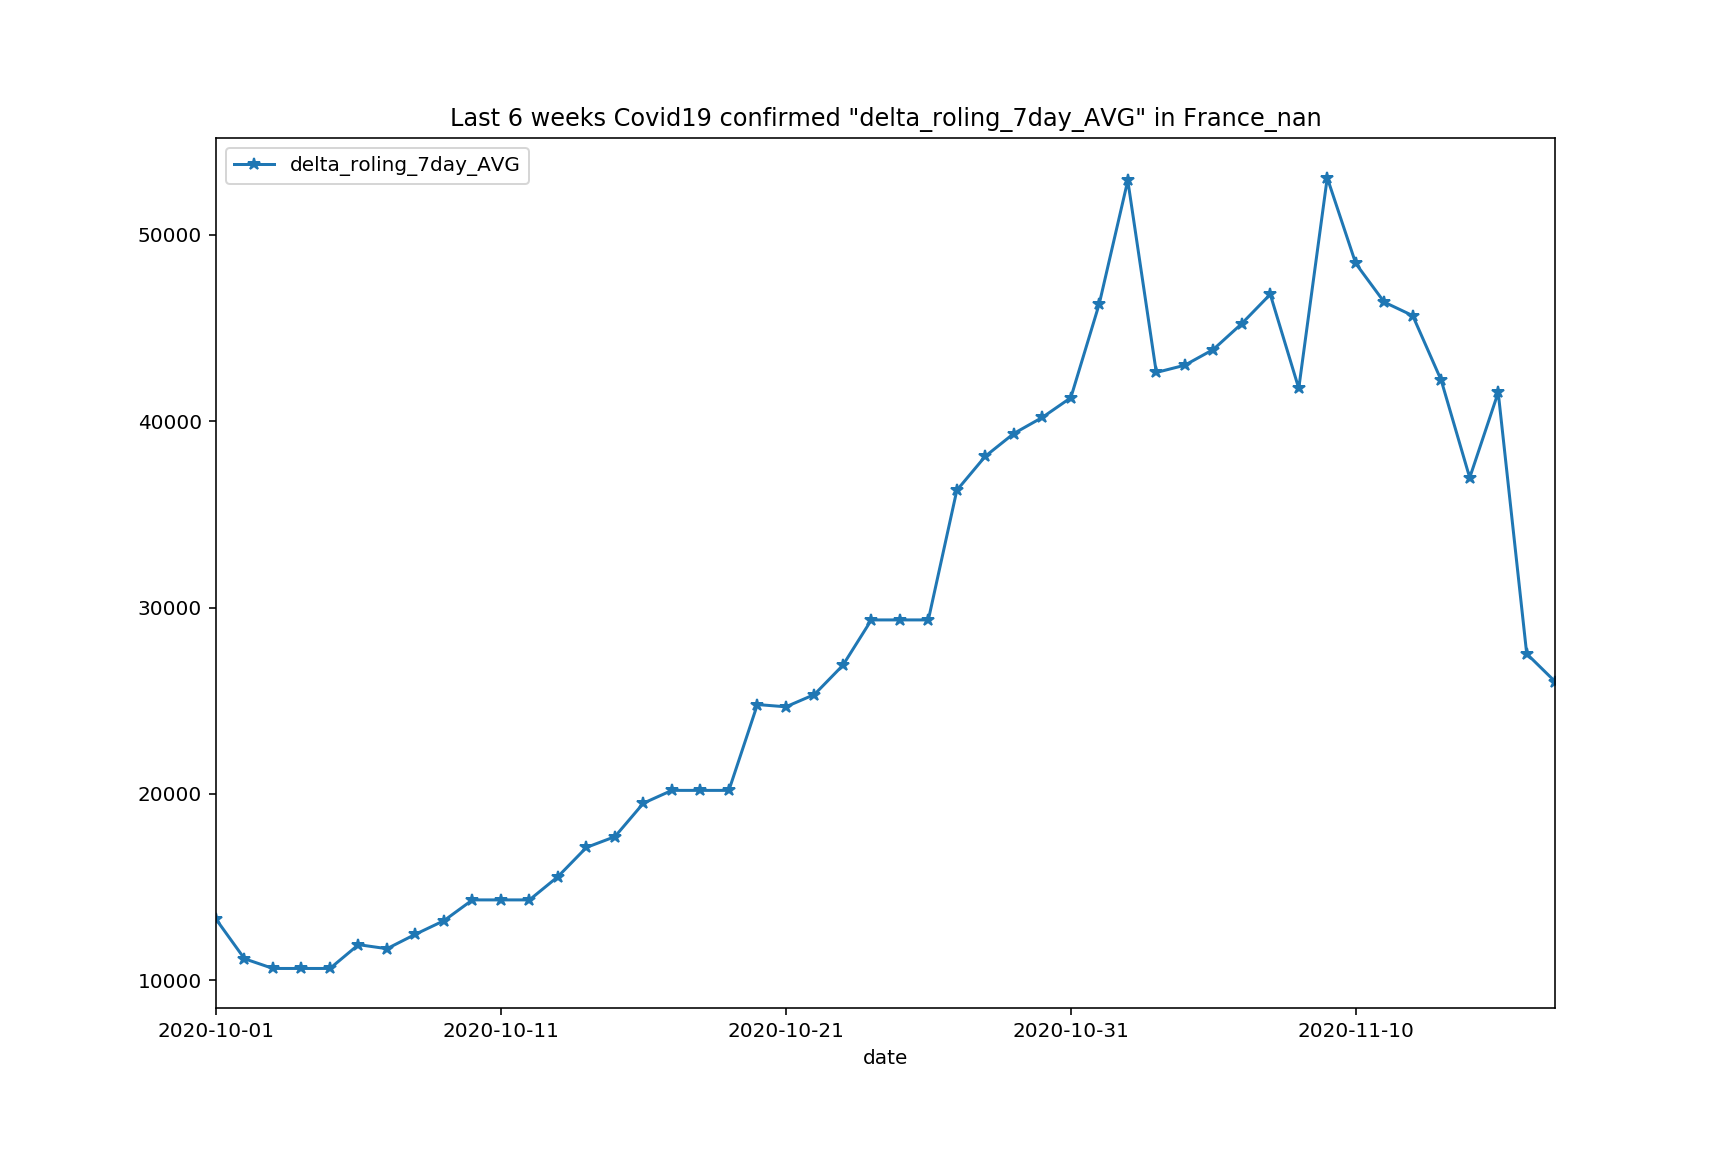

In [51]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


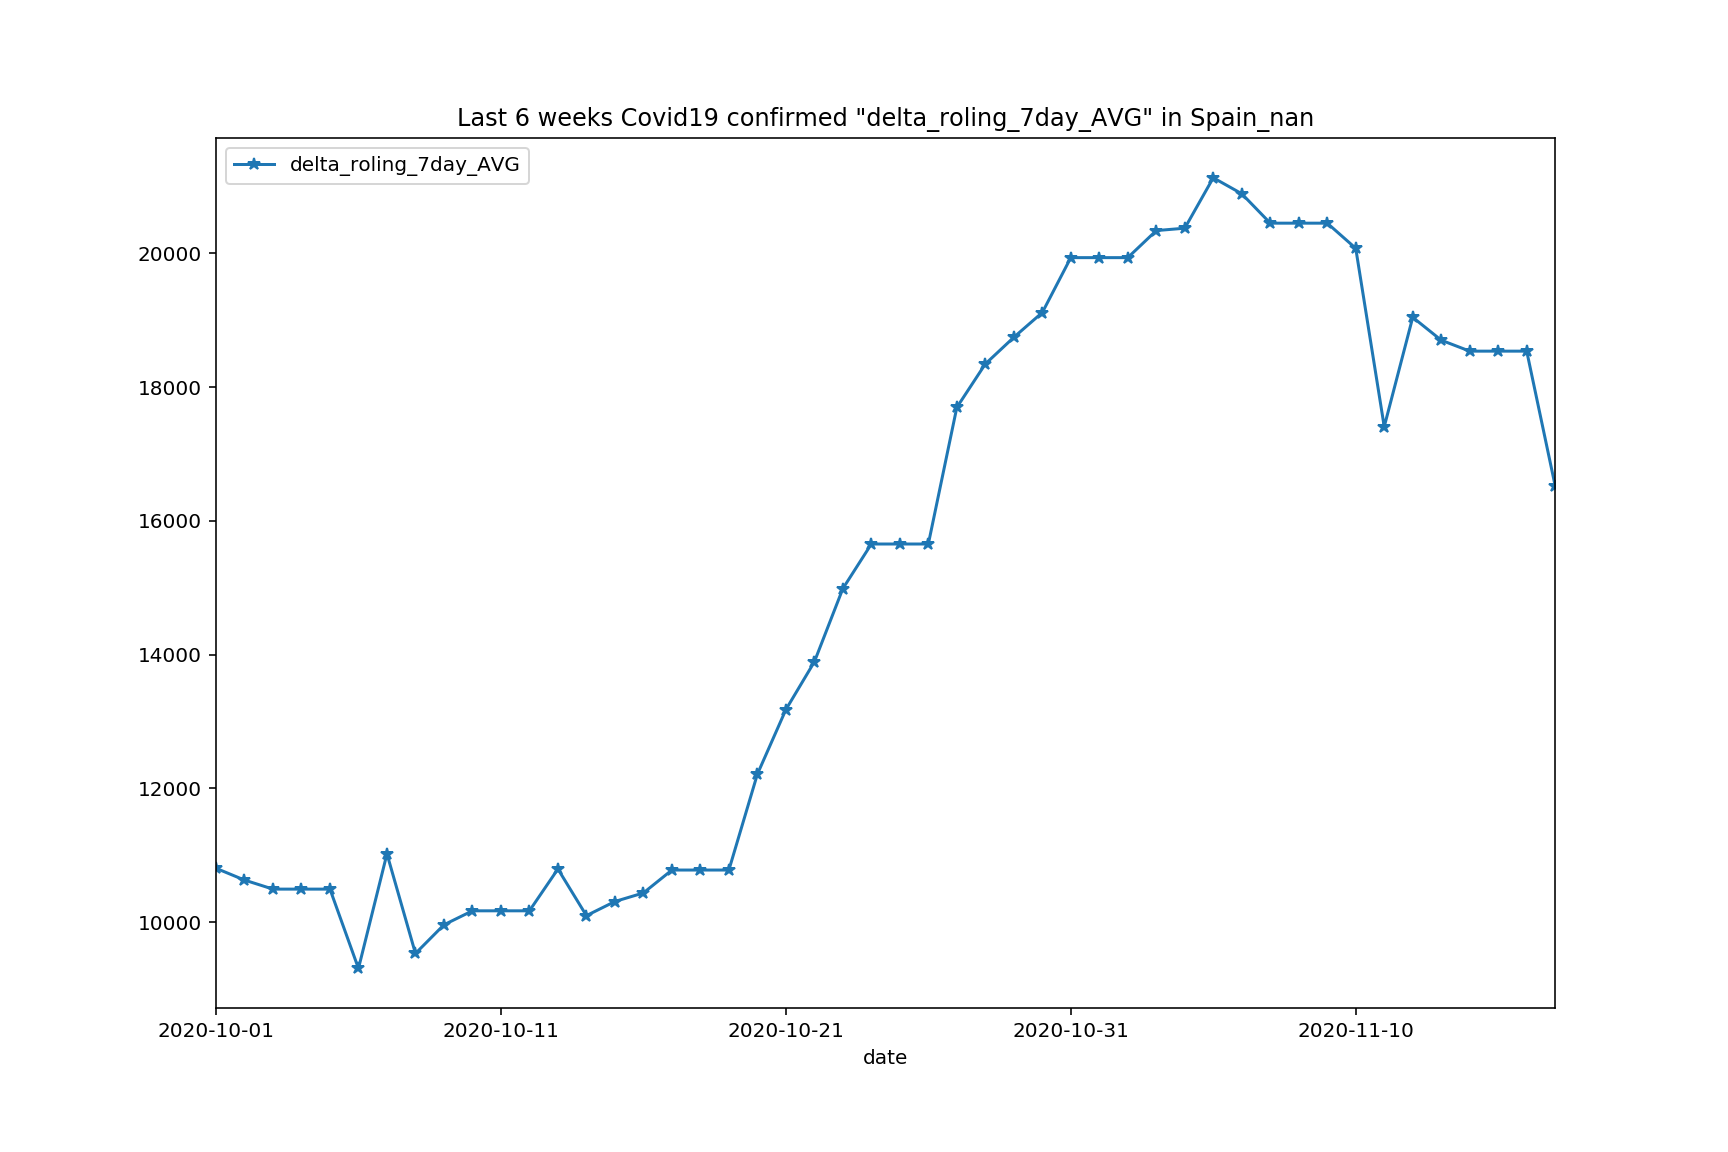

In [52]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


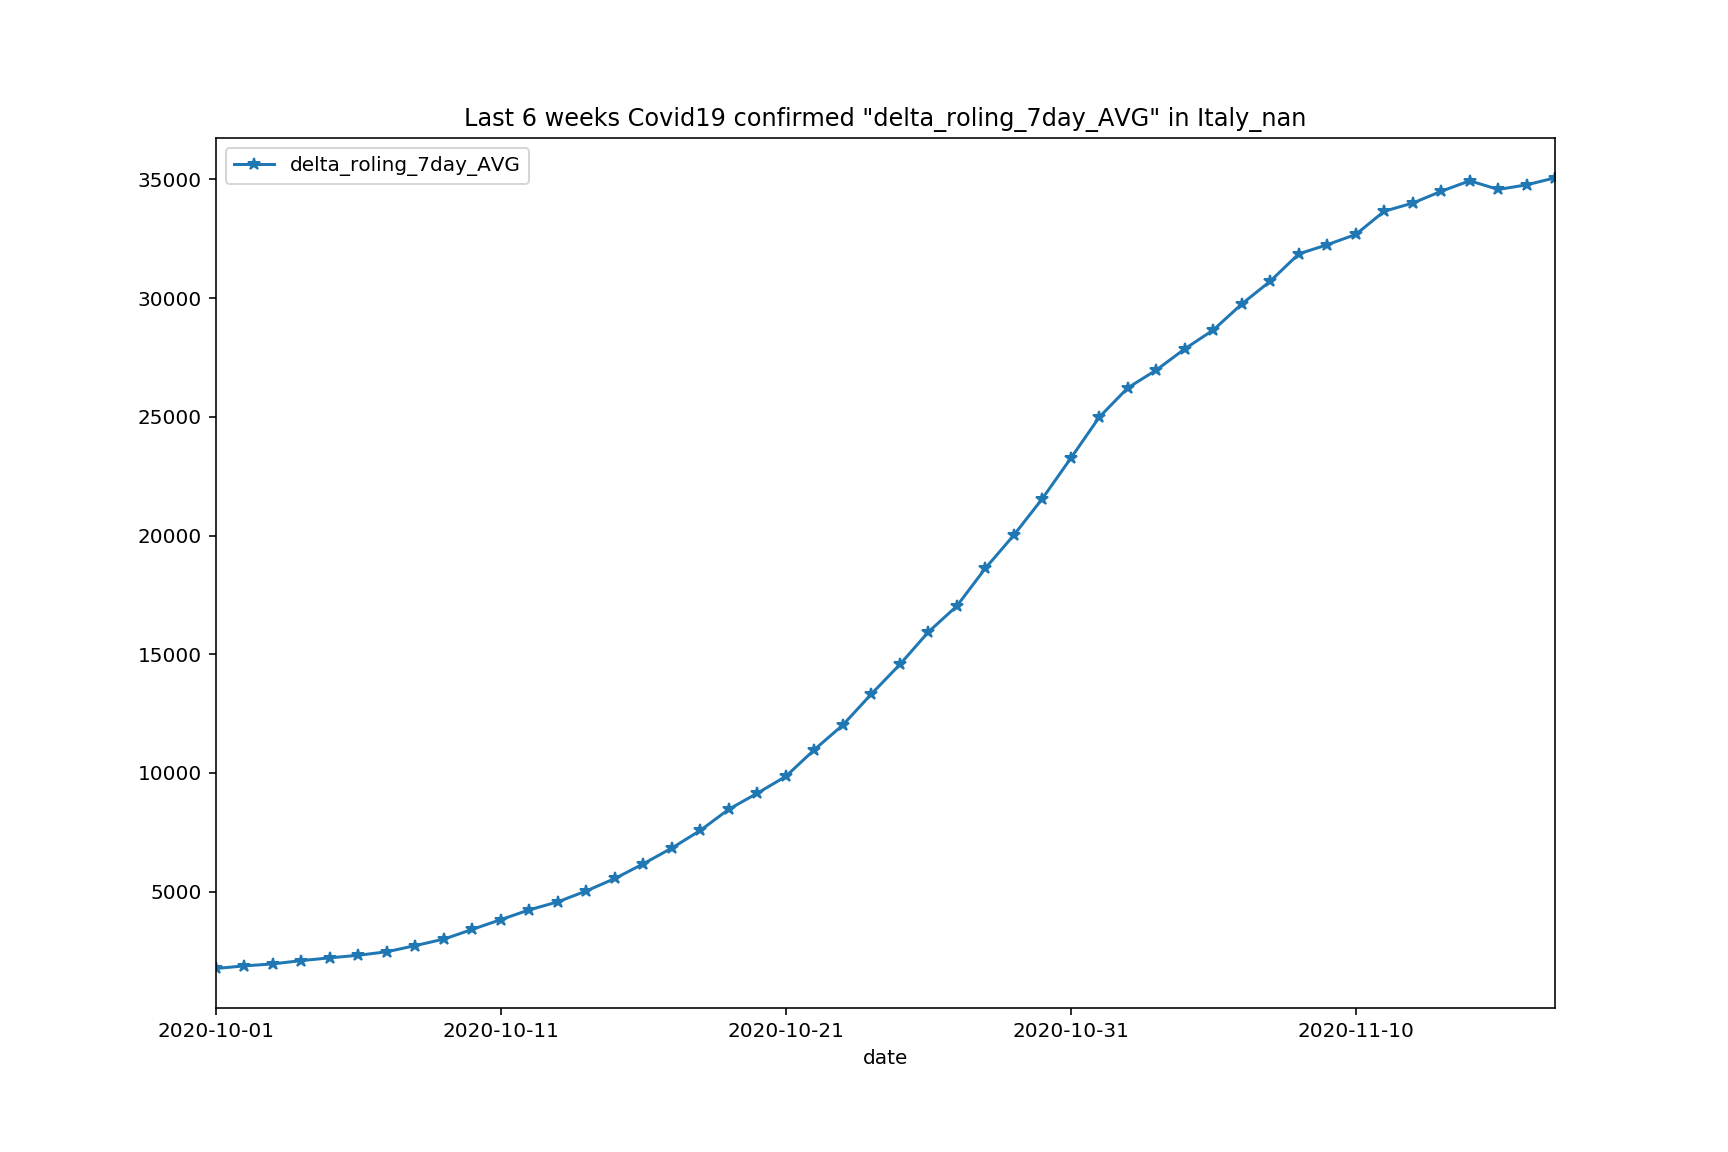

In [53]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


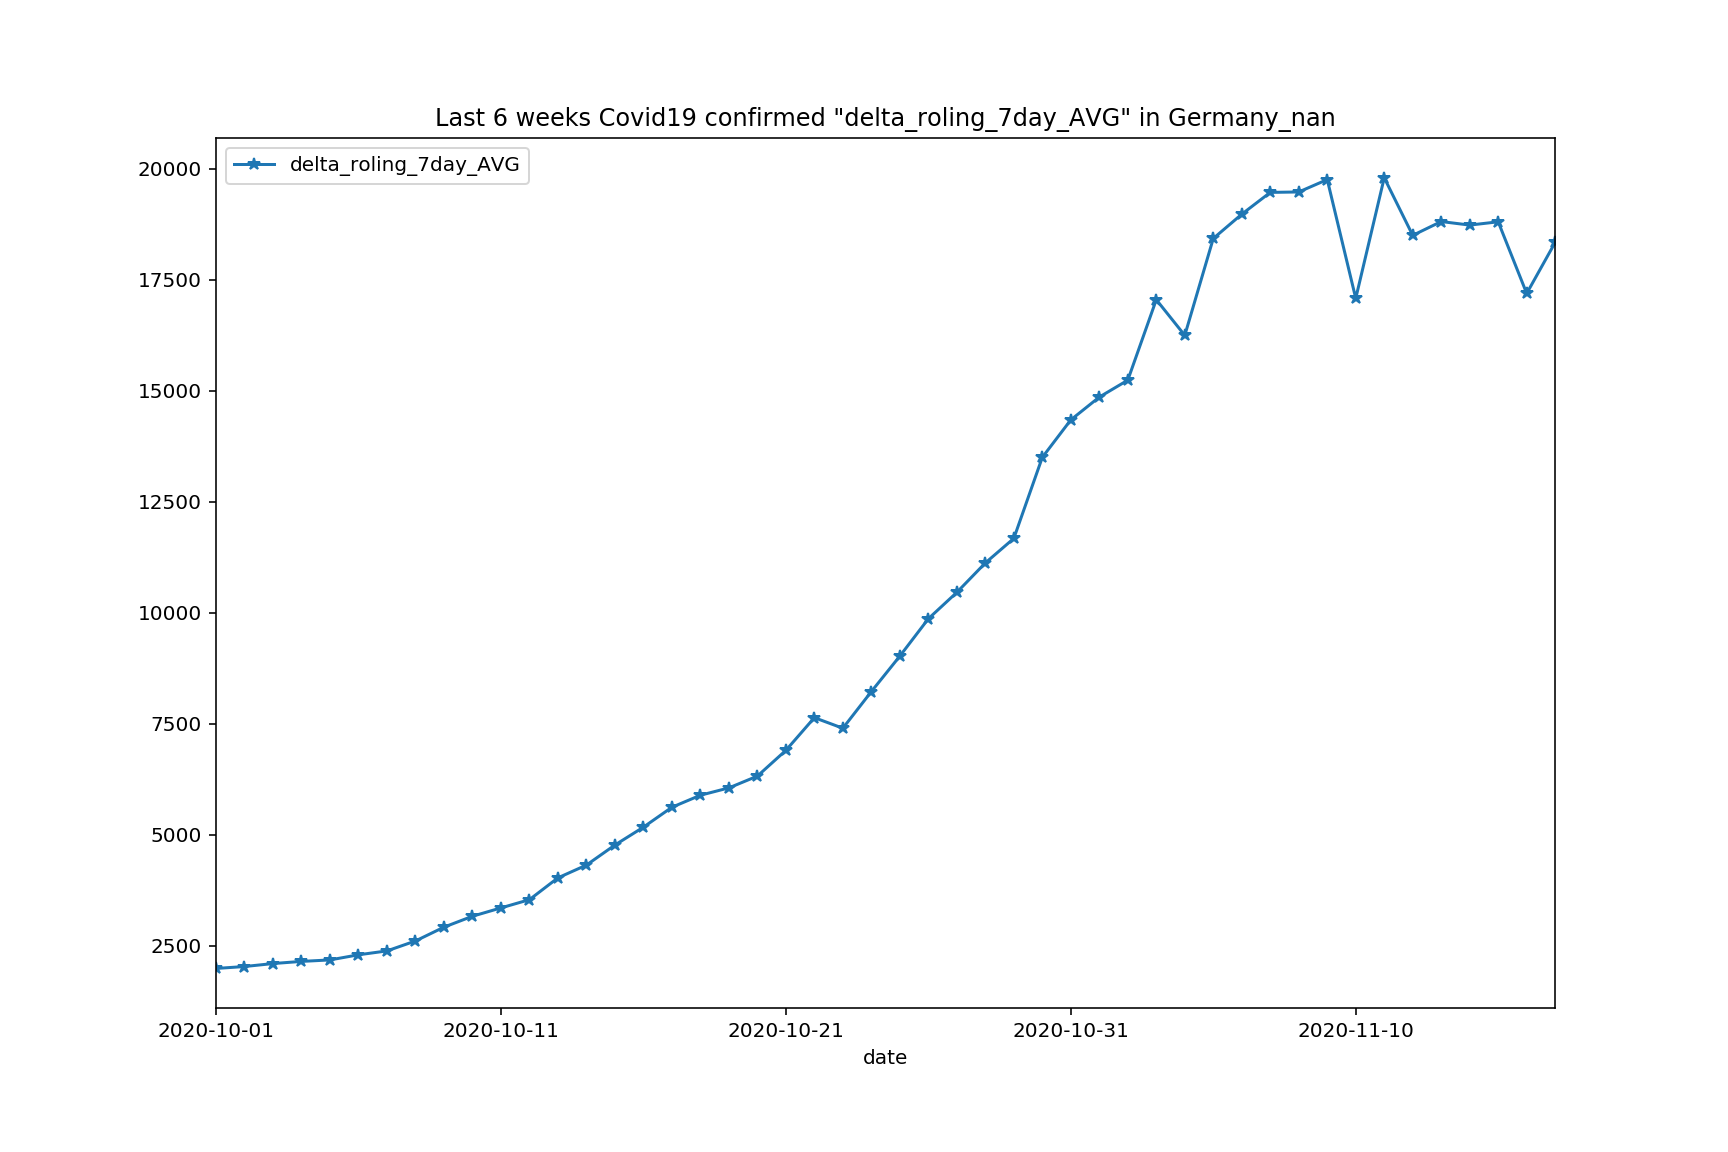

In [54]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


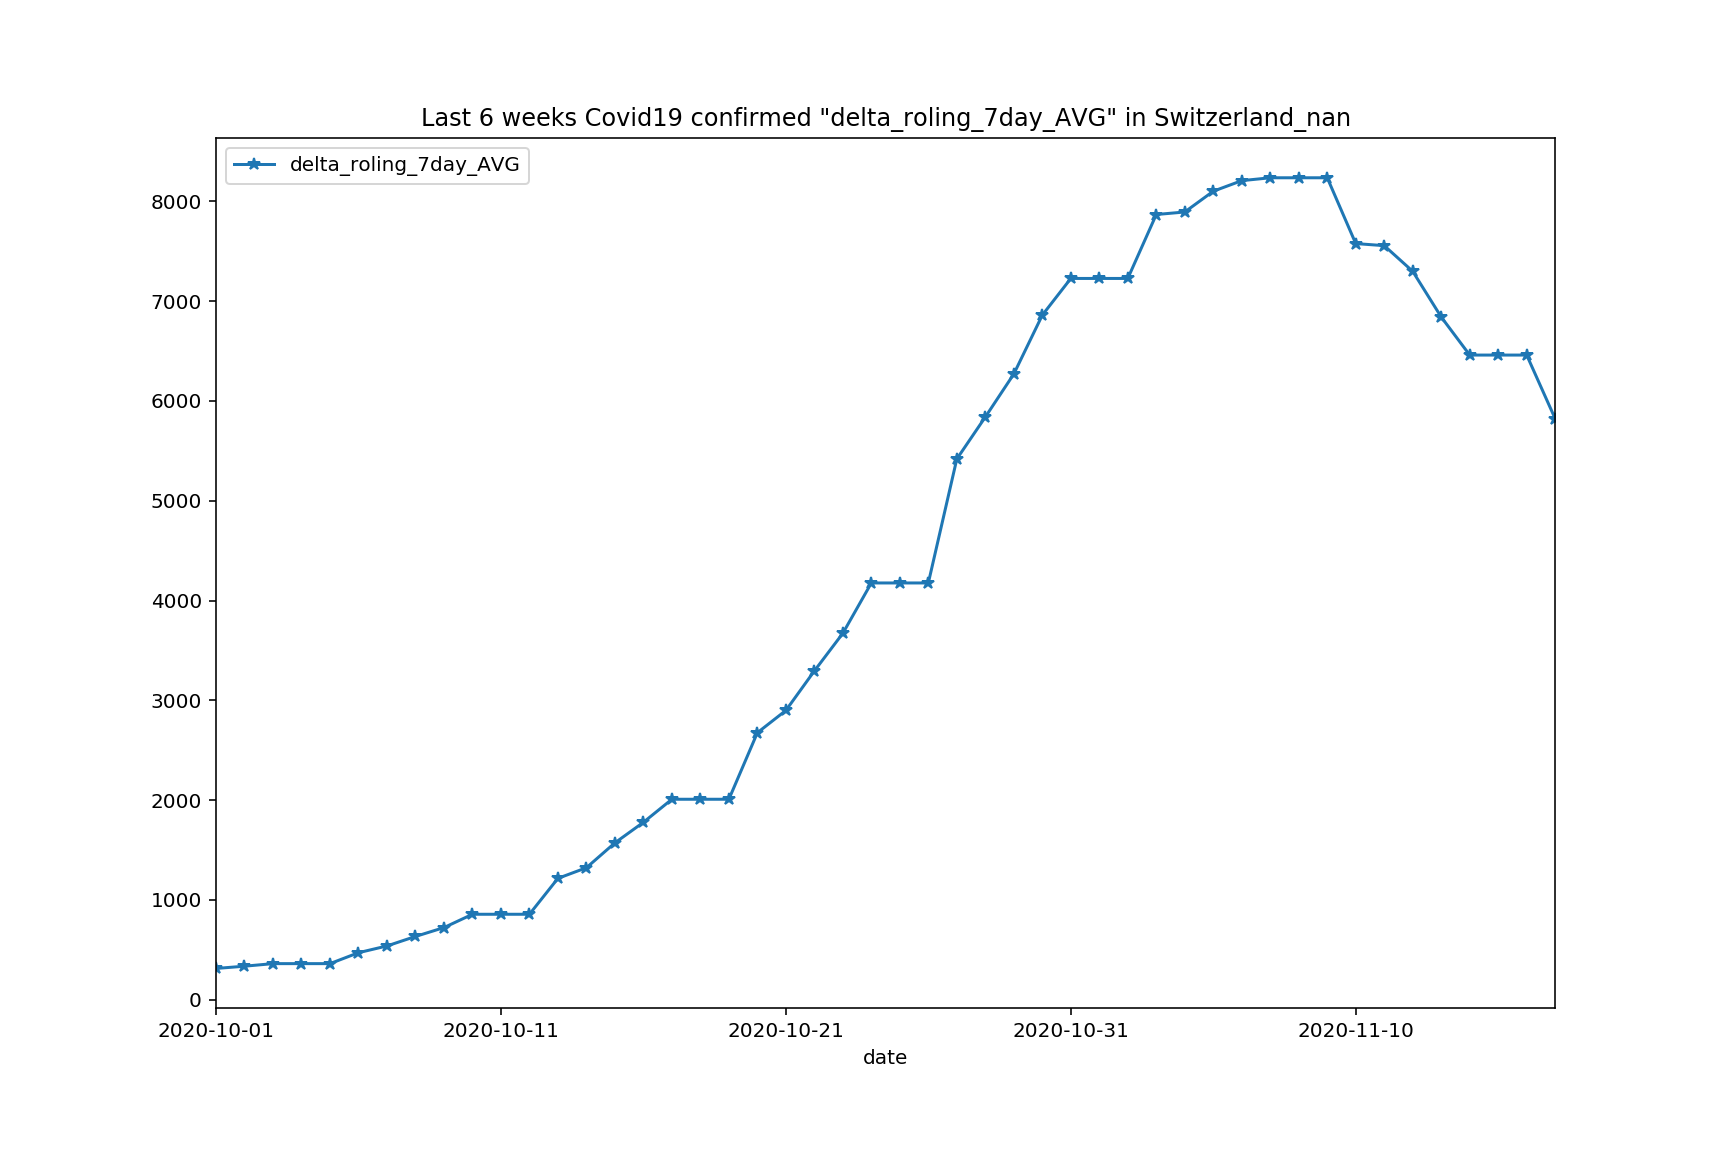

In [55]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


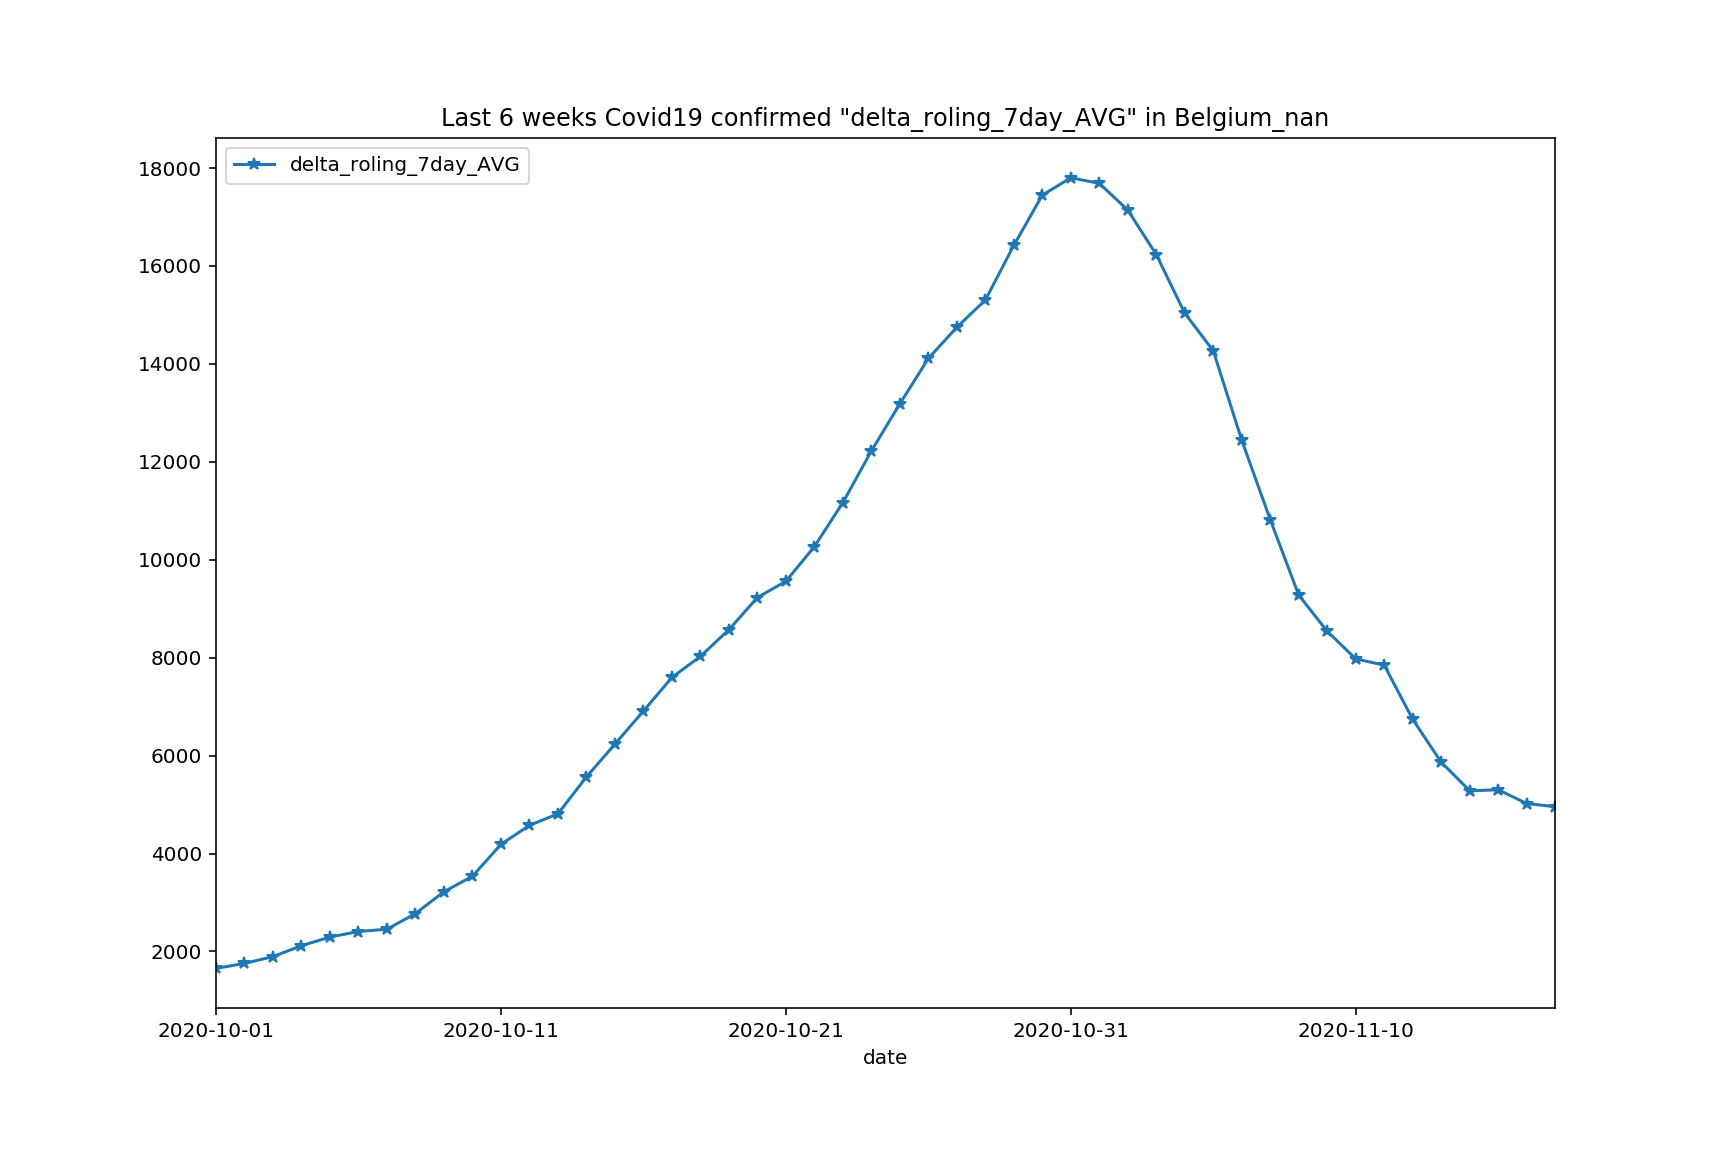

In [56]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


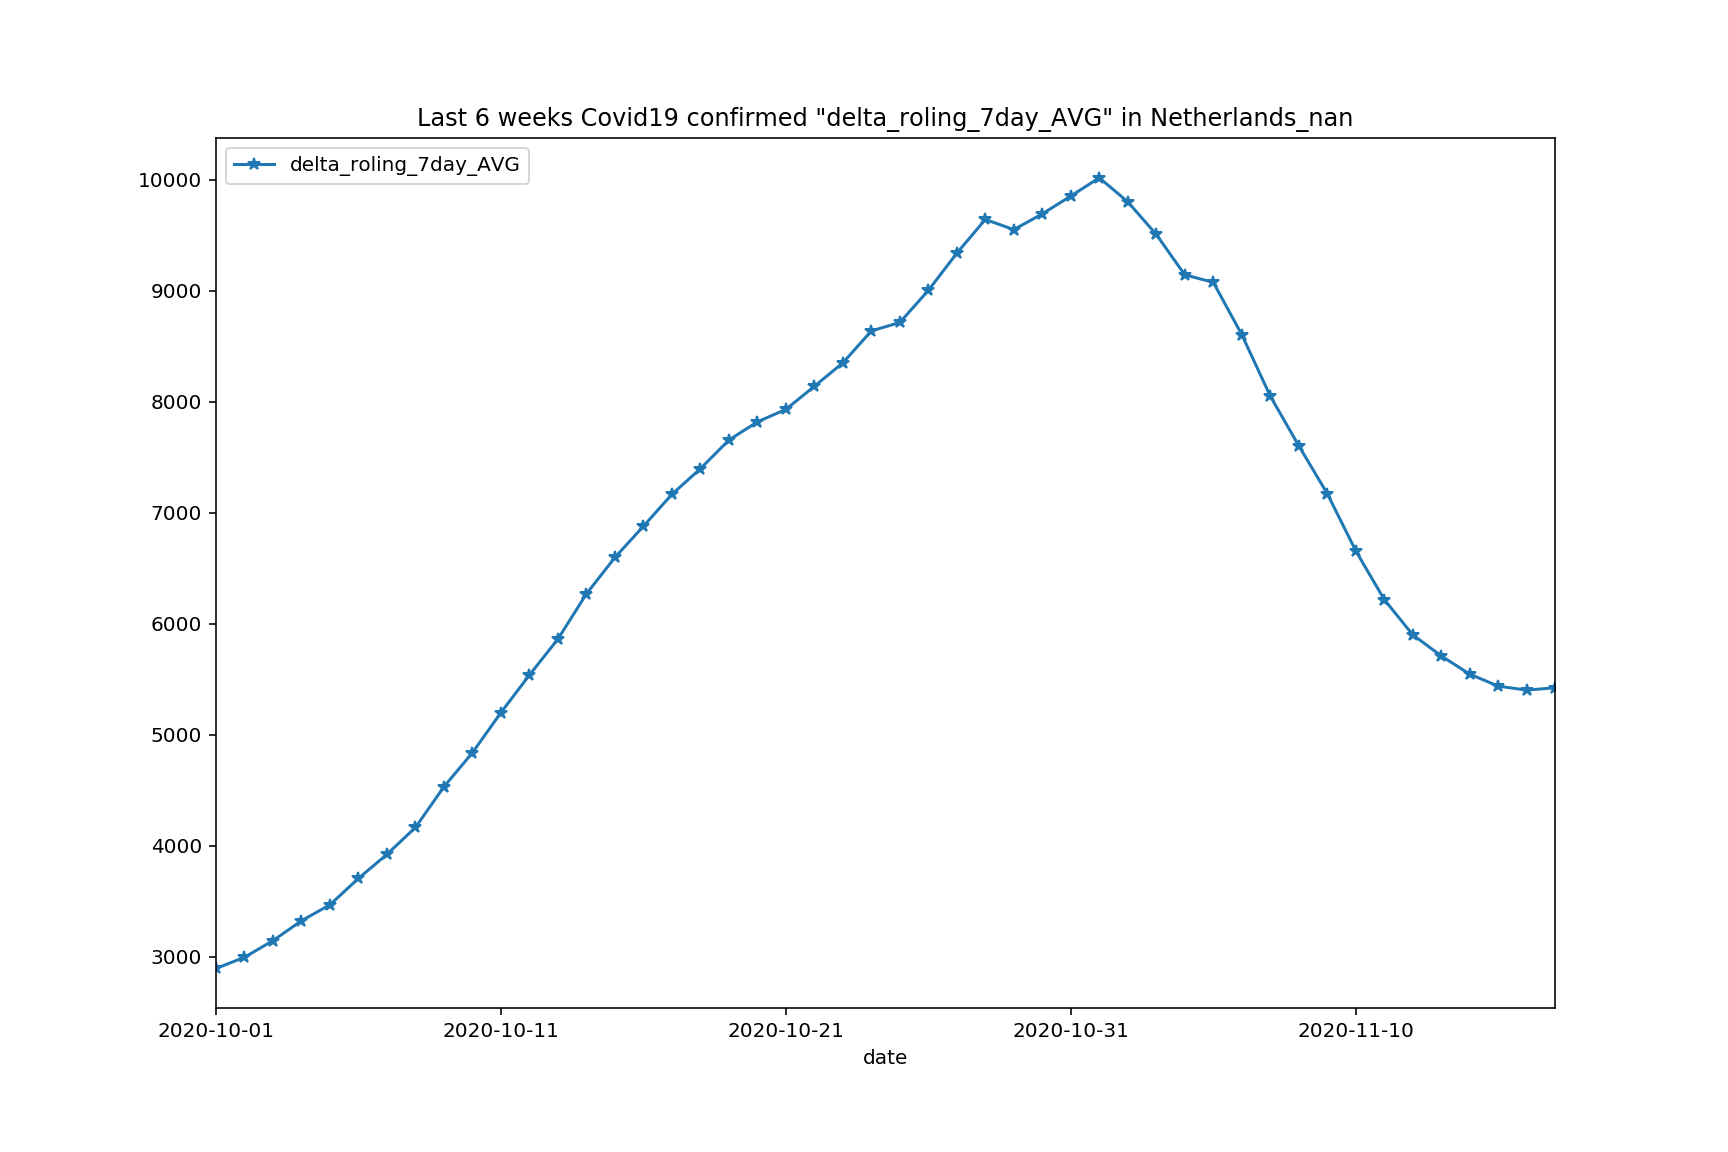

In [57]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


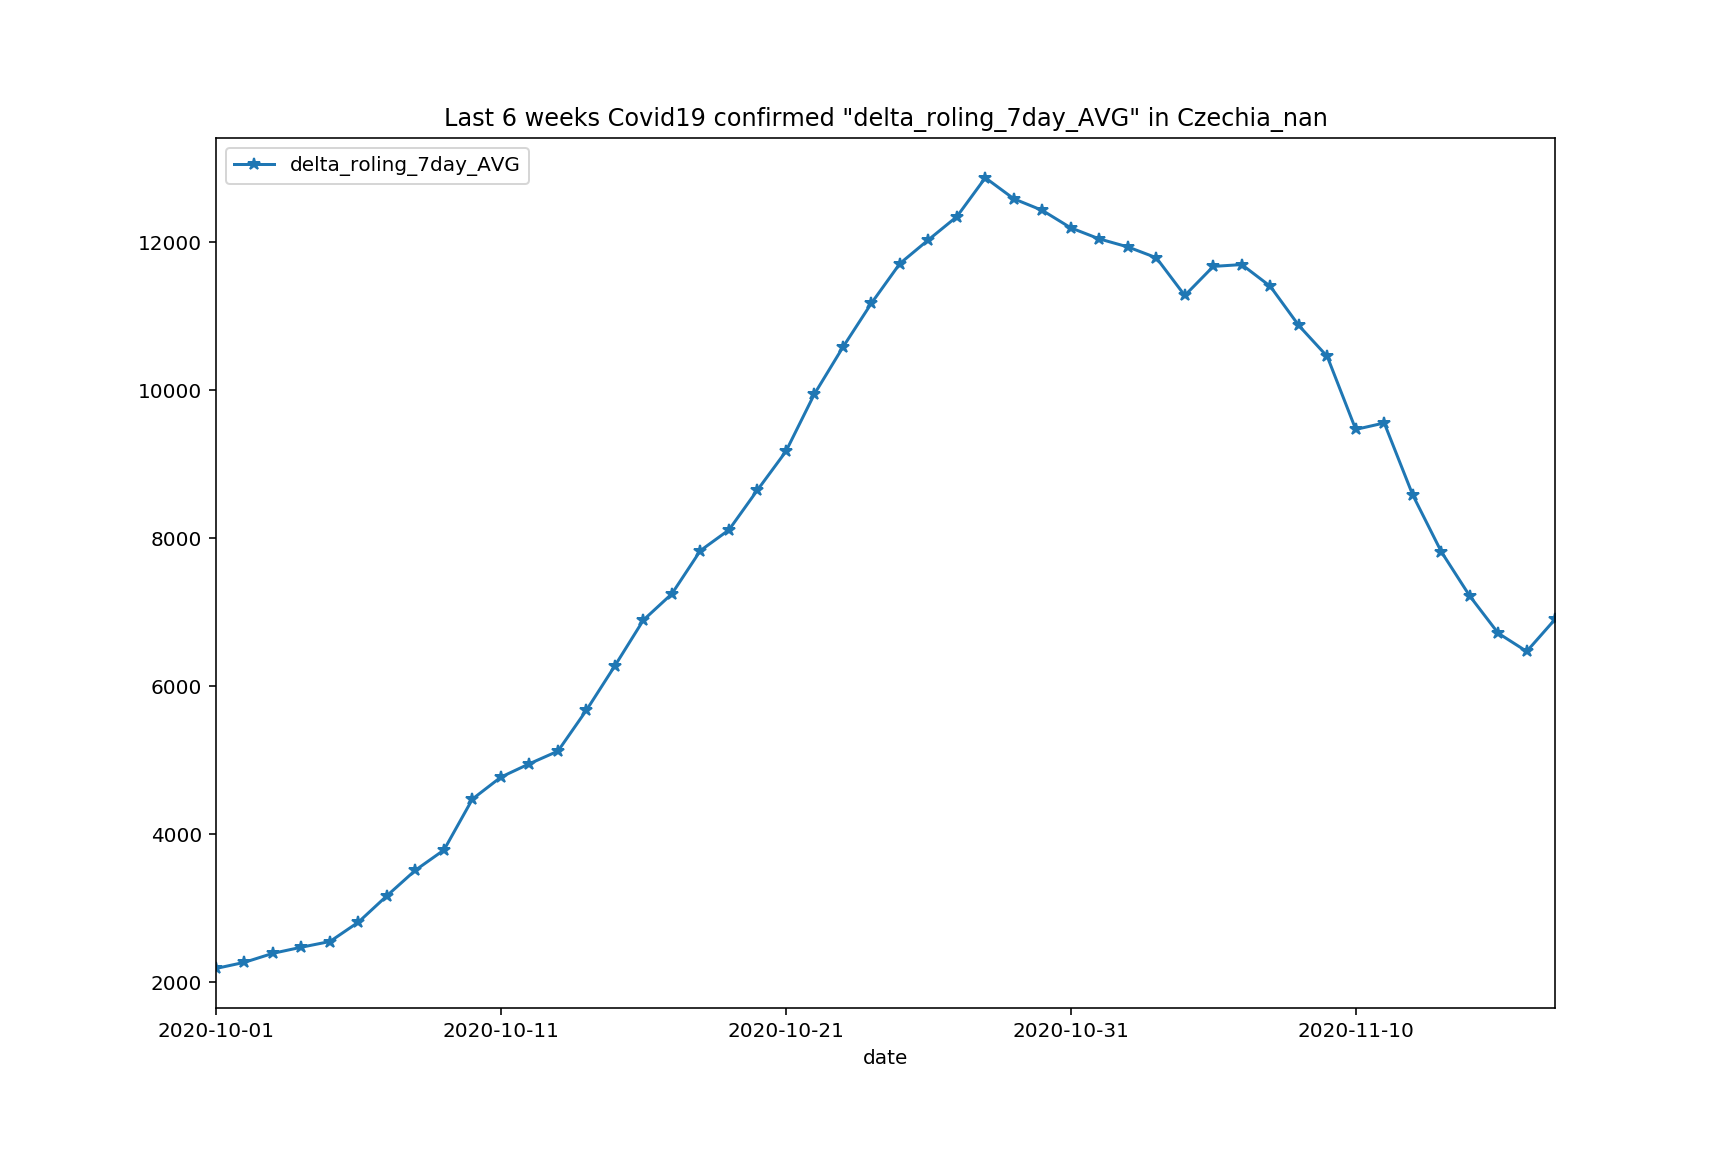

In [58]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


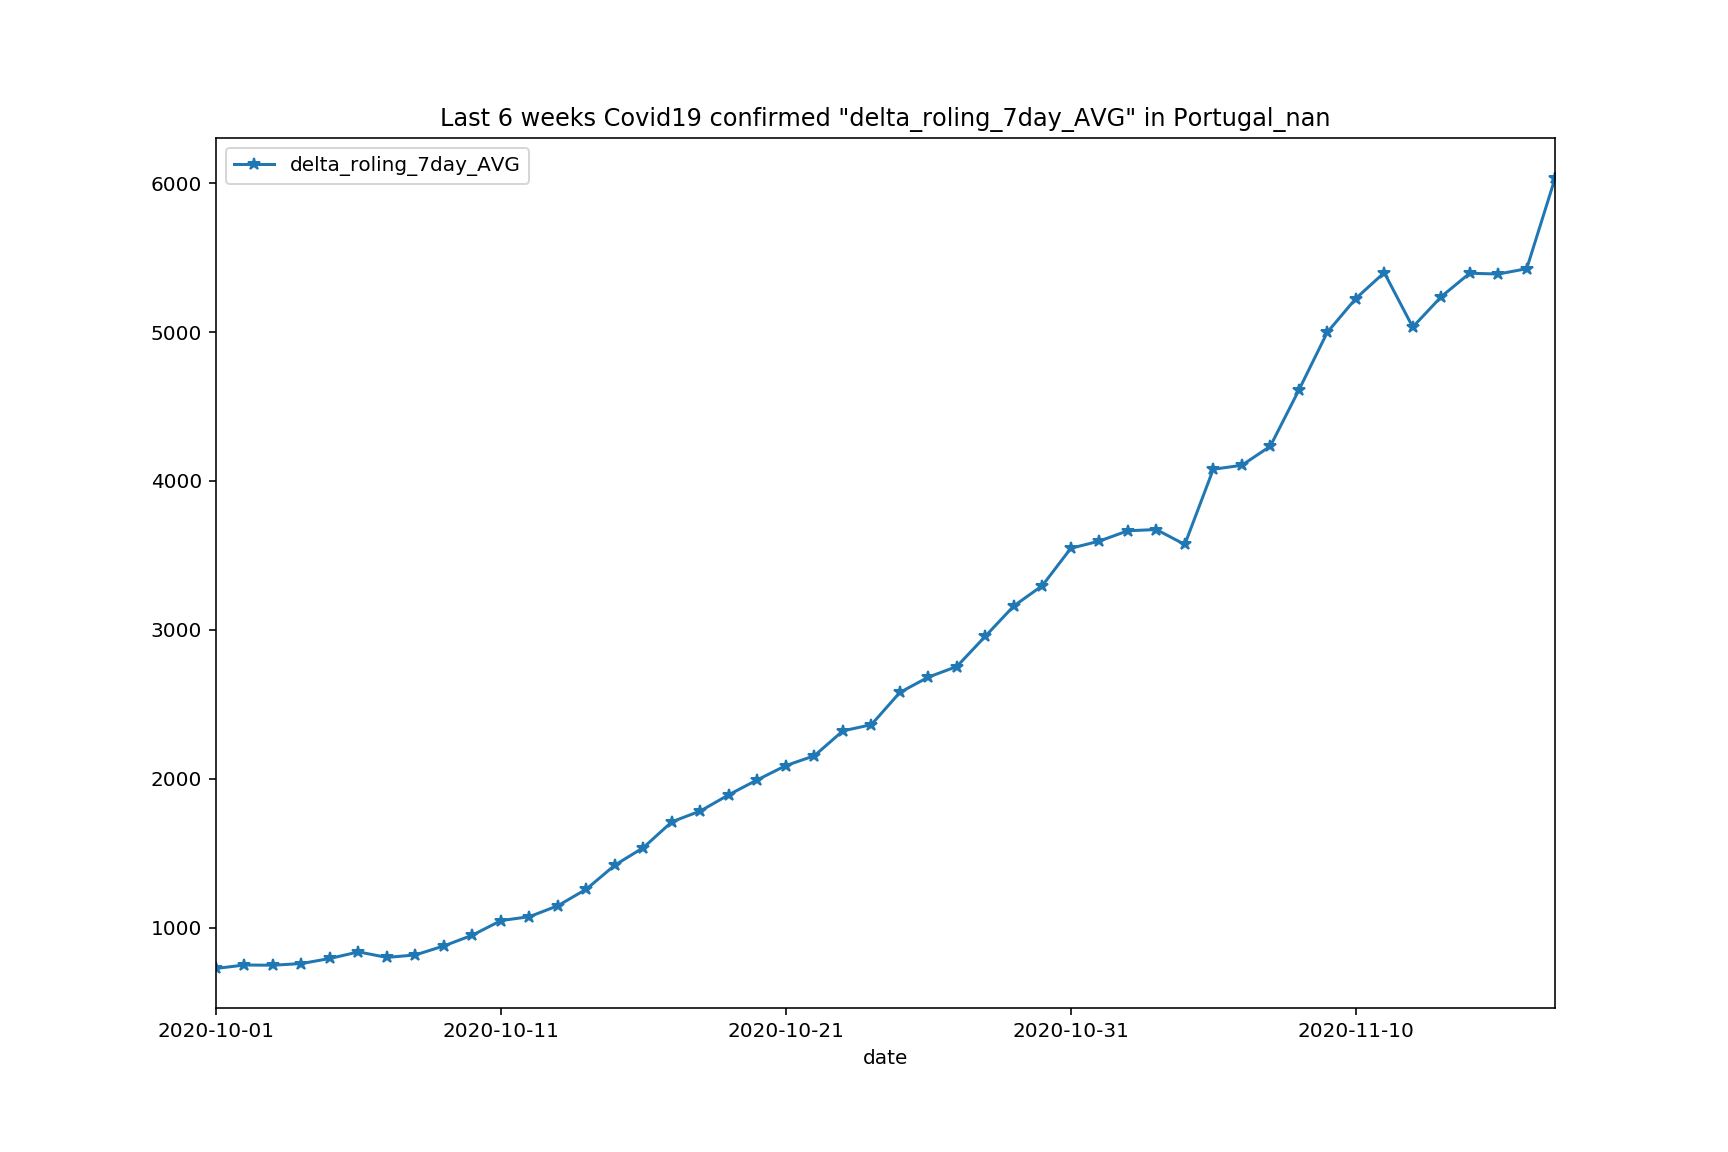

In [59]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [60]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [61]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
